<font size="10">Philadelphia Property Value Prediction</font>

This notebook serves as the final project of Job Connector-Data Science and Machine Learning program at Purwadhika Start-up and Coding School.

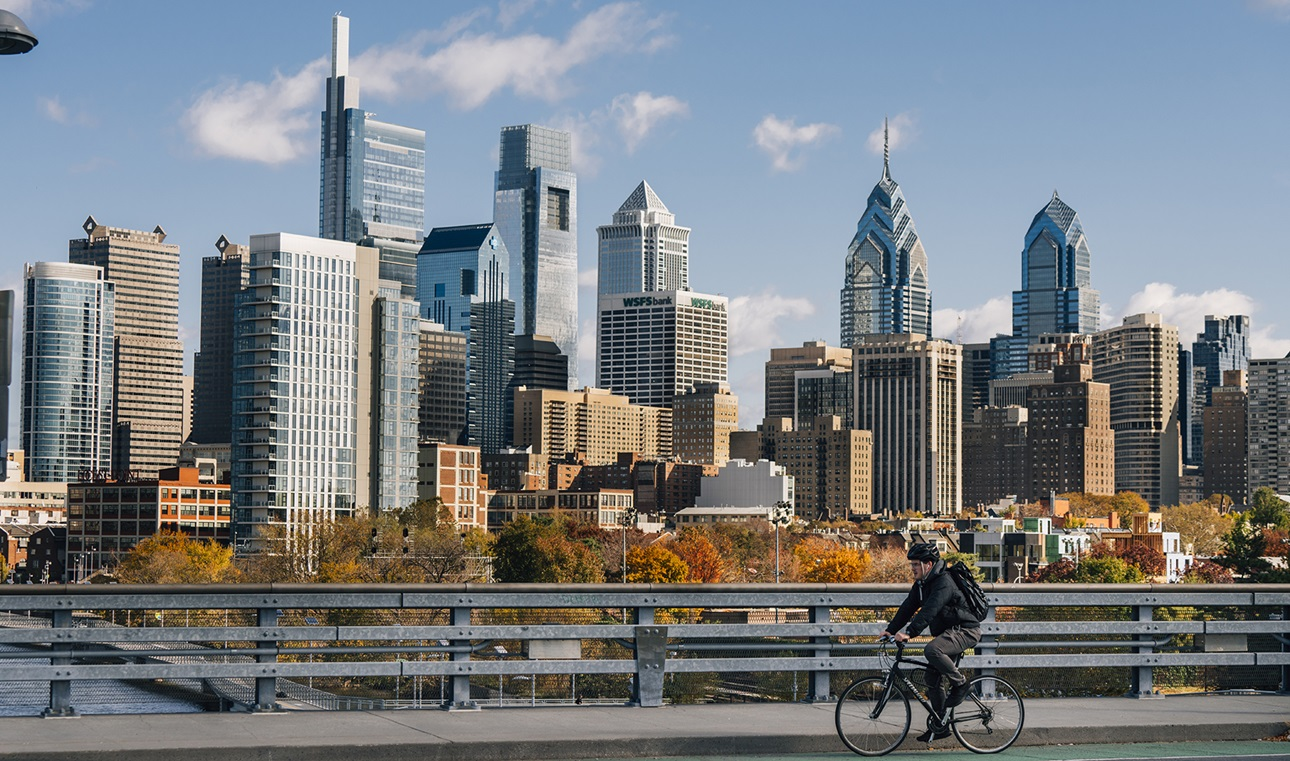

# Background

In January 2020, the total real estate value of Philadelphia is ranked 10th in the United States with total value of 577 billion US dollar (USD) and median property value of 246.000 USD [(Kapfidze, 2020)](https://www.lendingtree.com/home/mortgage/lendingtree-reveals-the-most-valuable-cities-in-america/). In January 2022, the median property value was increased by 9.1% to 300.000 USD from its value in January 2021, which caused by the decrease of property listed for sale was not in tune with the increase of market demand [(Bright MLS, 2022)](https://assets.ctfassets.net/1g8q1frp41ix/Y7yn7QGbvTD3rM7Gw4l3P/7b24c40e345b714610c2005c9d30f938/BRT_Q122_T3_Stats_Social_Post_LinkedIn_Philadelphia_1200x627.pdf ). Despite the high increment in property value, housing price in Philadelphia is still lower compared to other cities in the US [(Kapfidze, 2020)](https://www.lendingtree.com/home/mortgage/lendingtree-reveals-the-most-valuable-cities-in-america/).

Despite being the most preferred and one of the American Dream, homeownership in the Philadelphia is in decline. Homeownership was just 53% in 2019, declined from 58% in 2006.[(The Pew Charitable Trusts, 2014;](https://www.pewtrusts.org/~/media/assets/2014/07/pri-homeownership-report_final.pdf)[ Shields, 2021)](https://economyleague.org/providing-insight/leadingindicators/2021/09/08/homeowners2021) While these decreases in homeownership may worry some, it should be noted that economically successful cities like New York City, Washington D.C., Boston, and San Fransisco are predominantly renter cities [(Shields, 2021)](https://economyleague.org/providing-insight/leadingindicators/2021/09/08/homeowners2021). Reflecting from those cities, this condition may indicate a shifting in Philadelphia’s real estate market and opens opportunities for developers to build and/or buy rental units in Philadelphia. 

With its real estate market potential, Philadelphia is one of the best cities to buy and/or invest a property in the US. Also, with the decline of home demand index compared to 2021 [(Bright MLS, 2022)](https://assets.ctfassets.net/1g8q1frp41ix/Y7yn7QGbvTD3rM7Gw4l3P/7b24c40e345b714610c2005c9d30f938/BRT_Q122_T3_Stats_Social_Post_LinkedIn_Philadelphia_1200x627.pdf), 2022 may be the best time to invest in Philadelphia properties.           

## Business Problem Statements

One of the success factor for property transaction is the estimation of the property's market value. This estimation always done by professional property appraisal which has 300 USD fee per appraisal [(Home Advisor, 2022)](https://www.homeadvisor.com/cost/inspectors-and-appraisers/hire-a-property-appraiser/). Our team as Data Scientist who work in one of the biggest property agent in Philadelphia have an idea to build machine learning which can predict/estimate property market_value in Philadelphia. By doing so, the property agent can give a rough justified estimated price for the promotion without any help from appraisal professional. Thus, reducing the cost. Also, by getting the justified estimated price which are not under- or over-valued, hopefully, will benefited both seller and buyer, thus increasing the amount of success transactions of the property agent.

## Goals

Based on problem statements above, our goals in this project is to predict he property price based on its characteristic and/or location.

# Library

In [325]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Data Understanding

The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/adebayo/philadelphia-buildings-database), which includes two tables:

In [326]:
df1 = pd.read_csv('/Final Project Purwadhika/Data/PHL_BUILDING_FOOTPRINTS.csv')
len(df1)

543278

In [327]:
len(df1.columns)

12

In [328]:
df2 = pd.read_csv('/Final Project Purwadhika/Data/PHL_OPA_PROPERTIES.csv', low_memory=False)
len(df2)

581456

In [329]:
len(df2.columns)

75

Due to massive data in these datasets, dataset exploration was needed to understand the information we had. That includes knowing the description of each columns and defining the row of the dataset.

## Columns Description

The columns description was not provided by the page author. However, the author provide us with the [source](https://www.opendataphilly.org/) of the dataset. Further investigation led us to [Building Footprints](https://metadata.phila.gov/#home/datasetdetails/5543864f20583086178c4ea5/representationdetails/595e8e85ac27025c82c53c7c/) and [Philadelphia Properties and Assessment History](https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/) web pages that provide the columns description. To make reading easier, we summarize the informations into: [spreadsheet](https://docs.google.com/spreadsheets/d/1WapgNftGZMUBt6H2SkDbNedN6vAwY56xvdr9P1My-30/edit?usp=sharing).

Further investigation revealed that the PHL BUILDING FOOTPRINT table was not necessary for the project. That's mainly because the information in the table was not necessary for the property price prediction. It is important to note that a building can contain multiple properties, such as condominium or apartment building. We are interested in property price prediction. How can the height or the total area of the building determine the price of the property, which has its own different stories and total area?

Thus, only PHL OPA PROPERTIES table was used for this project.

In [330]:
df=df2.copy()

First of all, let's drop the unnecessary columns with a lot of helpless missing values and/or logically didn't contribute to the property price based on the [spreadsheet](https://docs.google.com/spreadsheets/d/1WapgNftGZMUBt6H2SkDbNedN6vAwY56xvdr9P1My-30/edit?usp=sharing). However, several columns were not dropped despite they logically didn't affect the property price because we suspect them to be informative enough to help us to describe or fill the Nan or anomalies in the dataset.

In [331]:
df.drop(columns=['assessment_date','beginning_point','book_and_page','census_tract','cross_reference','date_exterior_condition',
                 'exempt_building','exempt_land','geographic_ward','homestead_exemption','house_extension','house_number',
                 'mailing_zip','market_value_date','off_street_open','separate_utilities','sewer','site_type','state_code',
                 'street_code','street_direction','street_name','suffix','taxable_building','taxable_land','utility',
                 'year_built_estimate','objectid','mailing_address_1','mailing_address_2','mailing_care_of','mailing_city_state',
                 ], inplace=True)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581456 entries, 0 to 581455
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   basements                  325571 non-null  object 
 1   building_code              581456 non-null  object 
 2   building_code_description  581456 non-null  object 
 3   category_code              581456 non-null  int64  
 4   category_code_description  581456 non-null  object 
 5   central_air                285860 non-null  object 
 6   depth                      581454 non-null  float64
 7   exterior_condition         556191 non-null  float64
 8   fireplaces                 581435 non-null  float64
 9   frontage                   581454 non-null  float64
 10  fuel                       10900 non-null   object 
 11  garage_spaces              581435 non-null  float64
 12  garage_type                530522 non-null  object 
 13  general_construction       51

To ease the exploratory data analysis process, we grouped the columns based on its types and its connection with other column (see [spreadsheet](https://docs.google.com/spreadsheets/d/1WapgNftGZMUBt6H2SkDbNedN6vAwY56xvdr9P1My-30/edit?usp=sharing)):
- Property Location:
    - Location, Street Designation
- Classification of Property:
    - Building code, Building code description, Category code, Category code description
    - Unit
    - Zoning
    - Unfinished
    - Zip code
- Property Specifications:
    - Basements, Garage type, Garage spaces
    - Central air, Fireplaces, Other building, Unfinished, Topography, View type
    - Depth, Frontage, Total area, Total livable area
    - Exterior condition, Interior condition, Quality grade, General construction
    - Fuel, Type heater
    - Number of bathrooms, Number of bedrooms, Number of rooms, Number stories, Year built
    - Market value, Sale price, Sale date
- Others:
    - Parcel number, Parcel shape
    - Recording date, registry number

## Defining Rows

Now, since we already know the columns description, we also need to define the row of the dataset. What does the row represent? 

There are two possibilities if we quickly glance at the available columns:
- Either each row can represent one property for multiple times. That will explain the occurrence of the same location multiple times, differed by sale date.
- Or each row represent one unique property only.

To define rows, we need to do a detailed exploratory data analysis. Further investigation proves that each row represent an unique property in Philadelphia. Narratively explained in section 4.1. and 4.2.

# Cleaning and initial EDA of Features

To inspect columns. Mainly, to identify column types, also handling missing values and anomalies in the dataset.

## Category Code, Building Code and Zoning

### Category Code

In [333]:
df[['category_code','category_code_description']].dtypes

category_code                 int64
category_code_description    object
dtype: object

In [334]:
df['category_code'].value_counts()

1    461573
6     44612
2     42462
3     14396
4     14059
5      4354
Name: category_code, dtype: int64

In [335]:
df['category_code_description'].value_counts()

Single Family    461573
Vacant Land       44612
Multi Family      42462
Mixed Use         14396
Commercial        14059
Industrial         4354
Name: category_code_description, dtype: int64

Because this is not an ordinal data, category code description is more suitable to be used in prediction analysis than category code. Also, when encoded, it will be more informative to show the description of category code, rather than just a number code.

In [336]:
df['category_code_description'].isna().sum()

0

### Building Code

In [337]:
df[['building_code','building_code_description']].dtypes

building_code                object
building_code_description    object
dtype: object

In [338]:
df[['building_code','building_code_description']].nunique()

building_code                802
building_code_description    798
dtype: int64

In [339]:
df['building_code']=df['building_code'].apply(lambda x: str(x).strip())

In [340]:
df[df['building_code']=='W60']['building_code_description'].value_counts()

APT 2-4 UNITS 3.5 STY MAS    3
Name: building_code_description, dtype: int64

In [341]:
df[df['building_code']=='531']['building_code_description'].value_counts()

RES CONDO 2 STY MAS+OTH    1720
Name: building_code_description, dtype: int64

In [342]:
df[df['building_code']=='LC0']['building_code_description'].value_counts()

IND WAREHOUSE MASONRY    2302
Name: building_code_description, dtype: int64

Building code specifically describe the characteristic of the building. APT means Apartment, CONDO means Condominium, IND means Industrial, STY means Story (Elevation), etc. Since the description is specific to the building with a lot of unique values, this column is in consideration to be dropped in prediction model building process. However, this column will definitely help us to determine the type of the property.

In [343]:
df[['building_code','building_code_description']].isna().sum()

building_code                0
building_code_description    0
dtype: int64

### Zoning

In [344]:
df['zoning'].dtypes

dtype('O')

In [345]:
df['zoning'].nunique()

43

In [346]:
df['zoning']=df['zoning'].apply(lambda x: str(x).strip())
df['zoning'].unique()

array(['RSA5', 'ICMX', 'RM1', 'CMX1', 'I2', 'CMX2', 'RMX2', 'CMX25',
       'CA1', 'nan', 'CMX3', 'SPPOA', 'RM2', 'RSA3', 'CMX2.', 'CMX4',
       'RSA1', 'RSD1', 'IRMX', 'RMX3', 'CMX5', 'RM4', 'I1', 'RS3', 'RSA2',
       'RTA1', 'RSD3', 'RMX1', 'RM3', 'RSA', 'SPINS', 'RSD2', 'CA2', 'I3',
       'SPAIR', 'RSA4', '12', 'IP', 'SPSTA', 'SC', 'SPENT', '2002',
       'SPPOP', 'SP'], dtype=object)

In [347]:
df['zoning'].value_counts()

RSA5     288769
RM1      105876
RSA3      62750
CMX2      20772
RSD3      13180
RSA2      12602
RSA4      12188
CMX3       8053
RTA1       5766
RM2        5547
CMX1       5445
CMX5       4915
CMX25      4335
I2         4270
CMX4       4194
RM4        3814
RSD1       3270
ICMX       2993
RMX3       2276
RSA1       1294
RM3        1292
RMX1       1275
RSD2       1274
SPPOA       868
CA1         844
I1          725
IRMX        708
CA2         628
I3          433
SPINS       366
RMX2        271
CMX2.       211
nan         133
12           45
SPAIR        23
IP           23
SPSTA        16
RSA           3
SPENT         3
SPPOP         2
2002          1
RS3           1
SC            1
SP            1
Name: zoning, dtype: int64

Based on [Philadelphia Zoning Code Information Manual (2020)](https://www.phila.gov/media/20200213115058/NEW-ZONING-GUIDE_2020.pdf), we have several anomalies in unique values of zoning. Since the anomalies and missing values are in low frequency, it's safe to drop them. For typos, we can fix them.

#### Dropping Anomalies

In [348]:
index=df[df['zoning']=='2002'].index
df.drop(index=index, axis=0, inplace=True)

In [349]:
index=df[df['zoning']=='SC'].index
df.drop(index=index, axis=0, inplace=True)

In [350]:
index=df[df['zoning']=='SP'].index
df.drop(index=index, axis=0, inplace=True)

In [351]:
index=df[df['zoning']=='RS3'].index
df.drop(index=index, axis=0, inplace=True)

In [352]:
index=df[df['zoning']=='RSA'].index
df.drop(index=index, axis=0, inplace=True)

#### Fixing Typos

In [353]:
df['zoning']=df['zoning'].apply(lambda x: 'I2' if x=='12' else x)

In [354]:
df['zoning']=df['zoning'].apply(lambda x: 'CMX2' if x=='CMX2.' else x)

In [355]:
df['zoning']=df['zoning'].apply(lambda x: np.nan if x=='nan' else x)

In [356]:
df['zoning'].isna().sum()

133

#### Dropping NAs

In [357]:
index=df[df['zoning'].isna()].index
df.drop(index=index, axis=0, inplace=True)

In [358]:
df['zoning'].isna().sum()

0

#### Unique Values' Explanation

1. **CA1:Auto-oriented Commercial 1**. Intended to accommodate a range of uses, often in the form of shopping centers and other destination-oriented uses. CA1 for small scale shopping area.
2. **CA2:Auto-oriented Commercial 2**. Intended to accommodate a range of uses, often in the form of shopping centers and other destination-oriented uses. CA2 for large scale shopping center.
3. **CMX1:Commercial MiXed use 1**. Intended to accommodate neighborhood-serving retail and service uses, including pedestrian friendly retail commercial corridors.  CMX-1 is intended for small-scale, low-impact, neighborhood-serving commercial uses.
4. **CMX2:Commercial MiXed use 2**. Intended to accommodate neighborhood-serving retail and service uses, including pedestrian friendly retail commercial corridors. CMX-2 accommodates a wider range and size of commercial uses.
5. **CMX2.5:Commercial MiXed use 2.5**. Intended to accommodate neighborhood-serving retail and service uses, including pedestrian friendly retail commercial corridors. CMX-2.5 is intended to accommodate commercial uses in a pedestrian-friendly environment in commercial nodes and along commercial corridors. `(CMX1,CMX2,CMX2.5 are for retail and pedestrian)`
6. **CMX3:Commercial MiXed use 3**. Intended to accommodate community- and region-serving mixed use development, including retail and service uses. One community commercial mixed use (CMX-3)
7. **CMX4:Commercial MiXed use 4**. Intended to accommodate community- and region-serving mixed use development, including retail and service uses. Center City commercial mixed-use, max floor area ratio lower than CMX5
8. **CMX5:Commercial MiXed use 5**. Intended to accommodate community- and region-serving mixed use development, including retail and service uses. Center City commercial mixed-use, highest max floor area ratio. `(CMX3, CMX4, CMX5 are for community and region)`
9. **I1:Industrial 1**. Intended to accommodate manufacturing, warehousing, wholesale, and industrial uses. Low intensity industrial uses.
10. **I2:Industrial 2**. Intended to accommodate manufacturing, warehousing, wholesale, and industrial uses. Medium intensity industrial uses.
11. **I3:Industrial 3**. Intended to accommodate manufacturing, warehousing, wholesale, and industrial uses. High intensity industrial uses.
12. **IP:Industrial P**. Intended to accommodate manufacturing, warehousing, wholesale, and industrial uses. IP is intended to accommodate marine-related industrial uses like docks, wharves, piers, and related cargo facilities.
13. **ICMX:Industrial Commercial MiXed use**. Intended to accommodate commercial and low-impact industrial uses. ICMX is intended to provide for light industrial uses and also accommodate commercial uses. ICMX does not allow residential uses and light industrial uses do not need special approval before locating in an ICMX district.
14. **IRMX:Industrial Residental MiXed use**. Intended to accommodate a mix of low-impact industrial, artisan industrial, residential, and neighborhood commercial uses. IRMX is intended to provide for very low-impact industrial uses, including artists and artisan industry. A portion of a building in the IRMX district must contain a commercial or industrial use. An industrial use allows for a taller or larger building. Most industrial uses must receive special approval before they can be located in an IRMX district.
15. **RM1:Residental Multi-family 1**. Intended to accommodate moderate- to high-density, multi-unit residential buildings. Similiar to RSA5. The shortest building among Residental Multi-family.
16. **RM2:Residental Multi-family 2**. Intended to accommodate moderate- to high-density, multi-unit residential buildings. Short-medium height building among Residental Multi-family. Max Height=70% of lot area.
17. **RM3:Residental Multi-family 3**. Intended to accommodate moderate- to high-density, multi-unit residential buildings. Medium-Tall height building among Residental Multi-family. Max Height=150% of lot area.
18. **RM4:Residental Multi-family 4**. Intended to accommodate moderate- to high-density, multi-unit residential buildings. The tallest building among Residental Multi-family. Max Height=350% of lot area.
19. **RMX1:Residential MiXed use 1**. Intended to accommodate residential and mixed-use development, including master plan development. The RMX-1 district, in particular, is intended to conserve natural resources and preserve historically significant buildings, structures, and property.
20. **RMX2:Residential MiXed use 2**. Intended to accommodate residential and mixed-use development, including master plan development. RMX-2 are subject to master plan approval.
21. **RMX3:Residential MiXed use 3**. Intended to accommodate residential and mixed-use development, including master plan development. RMX-3 is intended for application primarily in higher density locations like Center City.
22. **RSA1:Residential Single-family Attached 1**. Intended to accommodate attached and semi-detached houses on individual lots, but can be applied to a mix of housing types. RSA-1 requires the largest lot size and setbacks. Min lot area=5000sqft
23. **RSA2:Residential Single-family Attached 2**. Intended to accommodate attached and semi-detached houses on individual lots, but can be applied to a mix of housing types. Min lot area=3150sqft.
24. **RSA3:Residential Single-family Attached 3**. Intended to accommodate attached and semi-detached houses on individual lots, but can be applied to a mix of housing types. Min lot area=2250sqft.
25. **RSA4:Residential Single-family Attached 4**. Intended to accommodate attached and semi-detached houses on individual lots, but can be applied to a mix of housing types. Min lot area=1620sqft.
26. **RSA5:Residential Single-family Attached 5**. Intended to accommodate attached and semi-detached houses on individual lots, but can be applied to a mix of housing types. Min lot area=1440sqft.
27. **RSD1:Residential Single-family Detached 1**. RSD districts are primarily intended for land use patterns characterized mostly by detached houses on individual lots, or where these land use patterns are desired in the future. Min lot width=75ft, min lot area 10000sqft.
28. **RSD2:Residential Single-family Detached 2**. RSD districts are primarily intended for land use patterns characterized mostly by detached houses on individual lots, or where these land use patterns are desired in the future. Min lot width=65ft, min lot area 7800sqft.
29. **RSD3:Residential Single-family Detached 3**. RSD districts are primarily intended for land use patterns characterized mostly by detached houses on individual lots, or where these land use patterns are desired in the future. Min lot width=50ft, min lot area 5000sqft.
30. **RTA1:Residential Two family Attached 1**. The minimum lot sizes, setbacks, and heights are identical to the residential single-family attached RSA-3 district, however the RTA district permits two-families, not just one, to reside in the dwelling.
31. **SPAIR:Special Purpose AIRport**. The SPAIR district regulations are designed to take into account the unique aspects of airports and the impact they have on the surrounding community. The district supports the development of airports and related uses, while minimizing the impact on surrounding communities.
32. **SPENT:Special Purpose ENTertainment**. The SPENT district is intended to encourage the orderly development of major entertainment facilities and other uses following recomendations of a master plan, which must be approved by City Council. The master plan should also provide for reasonable, compatible relationships between buildings that are situated on the periphery of the district and abutting districts.
33. **SPINS:Special Purpose INStitusional**. Typically, a SP-INS district is designated for a large-scale institutional purpose, like a university, college, or medical campus. The institution within the SP-INS district is responsible for developing a master plan, which must be approved by the City Council. 
34. **SPPOA:Special Purpose Parks and Open space-Active**. The special purpose parks and open space active (SPPO-A) district includes public parks, recreational activities, and open space areas.
35. **SPPOP:Special Purpose Parks and Open space-Passive**. The special purpose parks and open space passive (SPPO-P) district includes passive parks and open space areas.
36. **SPSTA:Special Purpose sports STAdium**. The SPSTA district is intended to accommodate large scale specialized sporting facilities, associated large capacity parking areas, and related uses and facilities, while also promoting high quality design of the facilities and mitigating adverse impacts on surrounding communities.

#### Simplify zoning

In [359]:
df['new_zoning']=df['zoning'].apply(lambda x: 'Residential Single Family' if (x=='RSD1') | (x=='RSD2') | (x=='RSD3') 
                   | (x=='RSA1') | (x=='RSA2') | (x=='RSA3') | (x=='RSA4') | (x=='RSA5') else 
                   'Residential Two Family' if (x=='RTA1') else
                   'Residential Multi Family' if (x=='RM1') | (x=='RM2') | (x=='RM3') | (x=='RM4') else
                   'Mixed Used' if (x=='RMX1') | (x=='RMX2') | (x=='RMX3') | (x=='CMX1') | (x=='CMX2') 
                   | (x=='CMX25') | (x=='CMX3') | (x=='CMX4') | (x=='CMX5') | (x=='ICMX') | (x=='IRMX')else
                   'Commercial' if (x=='CA1') | (x=='CA2') else
                   'Industrial' if (x=='I1') | (x=='I2') | (x=='I3') | (x=='IP') else 
                   'Special Purpose Airport' if (x=='SPAIR') else 
                   'Special Purpose Institution' if (x=='SPINS') else 
                   'Special Purpose Entertainment' if (x=='SPENT') else 
                   'Special Purpose Stadium' if (x=='SPSTA') else 
                   'Special Purpose Open Space-Active' if (x=='SPPOA') else 
                   'Special Purpose Open Space-Passive' if (x=='SPPOP') else '0')

In [360]:
df['new_zoning'].value_counts()

Residential Single Family             395327
Residential Multi Family              116529
Mixed Used                             55448
Residential Two Family                  5766
Industrial                              5496
Commercial                              1472
Special Purpose Open Space-Active        868
Special Purpose Institution              366
Special Purpose Airport                   23
Special Purpose Stadium                   16
Special Purpose Entertainment              3
Special Purpose Open Space-Passive         2
Name: new_zoning, dtype: int64

### Crosschecking Category and Building Code

What's the relationship between category code and building code? Does category code reflects the building code? If yes, then are there any misclassification of category code?

To answer those questions quickly, we will do text mining.

In [361]:
pd.set_option('display.max_rows', 802)
df.groupby('category_code_description')['building_code_description'].value_counts()

category_code_description  building_code_description 
Commercial                 STORE 1 STY MASONRY             1549
                           AUTO REPAIR SHOP MASONRY        1109
                           HSE WORSHIP ALL 2 STY MAS        740
                           COM CONDO 1 STY MASONRY          721
                           HSE WORSHIP ALL 1 STY MAS        552
                           STORE 2 STY MASONRY              462
                           STR/OFF 2 STY MASONRY            455
                           STR/OFF 1 STY MASONRY            434
                           MISC DAY CARE MASONRY            353
                           HSE WORSHIP ALL 3 STY MAS        327
                           OFF BLD N/COM W/PKG MASON        294
                           OFF BLD N/PKG N/COM MASON        273
                           SCHOOL 3 STY MASONRY             271
                           REST'RNT W/BAR MASONRY           261
                           STORE 3 STY MASONRY    

In [362]:
def kata(check):
    check=check.str.extractall('([a-zA-Z]+)')
    check.columns=['check']
    b=check.reset_index(drop=True)
    check=b['check'].value_counts()
    
    kata={'kata':check.index, 'freq':check.values}
    kata=pd.DataFrame(kata)
    kata.index=kata['kata']
    kata.drop('kata',axis=1,inplace=True)
    kata.sort_values('freq',ascending=False,inplace=True)
    return kata

In [363]:
kata_1=kata(df[df['category_code']==1]['building_code_description'])
kata_2=kata(df[df['category_code']==2]['building_code_description'])
kata_3=kata(df[df['category_code']==3]['building_code_description'])
kata_4=kata(df[df['category_code']==4]['building_code_description'])
kata_5=kata(df[df['category_code']==5]['building_code_description'])
kata_6=kata(df[df['category_code']==6]['building_code_description'])

In [364]:
kata_1.rename(columns={'freq':'Single Family'},inplace=True)
kata_2.rename(columns={'freq':'Multi Family'},inplace=True)
kata_3.rename(columns={'freq':'Mixed Use'},inplace=True)
kata_4.rename(columns={'freq':'Commercial'},inplace=True)
kata_5.rename(columns={'freq':'Industrial'},inplace=True)
kata_6.rename(columns={'freq':'Vacant Land'},inplace=True)

In [365]:
kata_count=pd.concat([kata_1,kata_2,kata_3,kata_4,kata_5,kata_6],axis=1)
kata_count.fillna(0,inplace=True)

In [366]:
kata_count

,Single Family,Multi Family,Mixed Use,Commercial,Industrial,Vacant Land
kata,,,,,,
STY,459237.0,37284.0,14396.0,7336.0,4.0,0.0
MASONRY,406197.0,5151.0,6867.0,9618.0,3966.0,0.0
ROW,332555.0,16173.0,7051.0,0.0,0.0,0.0
GAR,177091.0,0.0,0.0,369.0,0.0,0.0
B,145700.0,0.0,797.0,0.0,0.0,0.0
W,66418.0,0.0,6303.0,814.0,0.0,0.0
DET,56920.0,1008.0,218.0,0.0,0.0,0.0
D,51978.0,5318.0,440.0,0.0,0.0,0.0
S,38755.0,5318.0,440.0,5.0,0.0,0.0


By skimming two tables above, it seems that the category code was classified using building code description. But, since the data is a lot to check with, we will answer the question using a simple modeling.

In [367]:
text=df['building_code_description']
label=df['category_code_description']

In [368]:
text_train, text_test, y_train, y_test = train_test_split(text, label, stratify=label, random_state=2020)

In [369]:
vect=CountVectorizer().fit(text_train)
x_train=vect.transform(text_train)
x_test=vect.transform(text_test)

In [370]:
feature=vect.get_feature_names_out()

In [371]:
model=LogisticRegression(n_jobs=-1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [372]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

   Commercial       0.98      1.00      0.99      3513
   Industrial       1.00      1.00      1.00      1088
    Mixed Use       1.00      0.98      0.99      3599
 Multi Family       1.00      1.00      1.00     10601
Single Family       1.00      1.00      1.00    115388
  Vacant Land       1.00      1.00      1.00     11140

     accuracy                           1.00    145329
    macro avg       1.00      1.00      1.00    145329
 weighted avg       1.00      1.00      1.00    145329



This model proves that building code description can specifically predict which category code the data belongs to. It's very specific that it proves that there are no misclassification of category code in the dataset.

Furthermore, it confirms that category code is representing the type of the property, not the building. For example, logically, condominium (CONDO) should be classified into multi family if category code represents the building. However, it's mostly single family, which represents the property or the room inside the condominium. Thus, it is important to note that property is not always the whole building. And one building can contains multiple properties.

In [373]:
df[df['building_code_description'].str.contains('CONDO')].value_counts('category_code_description')

category_code_description
Single Family    34656
Commercial         932
Industrial         101
dtype: int64

Since the category code description is somehow confusing, it is better to change the description into:
1. Residential
2. Hotel and Apartments
3. Store with Dwelling
4. Commercial
5. Industrial
6. Vacant Land

### Crosschecking Building Code and Zoning

Based on [Philadelphia Zoning Code Information Manual (2020)](https://www.phila.gov/media/20200213115058/NEW-ZONING-GUIDE_2020.pdf), several zones are specific to a certain type of building, i.e. RSD zones are meant for single family residential building and parks only.

In [374]:
df[(df['building_code_description'].str.contains('SCHOOL'))&((df['zoning']=='RSD1')|(df['zoning']=='RSD2')|(df['zoning']=='RSD3'))][['location','building_code_description','category_code_description','zoning']]

,location,building_code_description,category_code_description,zoning
498523,3500 ACADEMY RD,SCHOOL 3 STY MASONRY,Commercial,RSD2
498721,8901 ALICIA ST,SCHOOL 3 STY MASONRY,Commercial,RSD1
498906,531 RIGHTER ST,SCHOOL 3 STY MASONRY,Commercial,RSD1
498910,201 SPRING LN,SCHOOL 2 STY MASONRY,Commercial,RSD3
498912,1102-96 E TULPEHOCKEN ST,SCHOOL 3 STY MASONRY,Commercial,RSD3
499126,11000 BUSTLETON AVE,SCHOOL 2 STY MASONRY,Commercial,RSD3
499130,1001 BYBERRY RD,SCHOOL 3 STY MASONRY,Commercial,RSD1
499785,8000 CHEROKEE ST,SCHOOL 2 STY MASONRY,Commercial,RSD1
499787,8836 CREFELD ST,SCHOOL 3 STY MASONRY,Commercial,RSD1
499943,8725 VERREE RD,SCHOOL 2 STY MASONRY,Commercial,RSD3


In [375]:
df[(df['building_code_description'].str.contains('STORE'))&((df['zoning']=='RSD1')|(df['zoning']=='RSD2')|(df['zoning']=='RSD3'))][['location','building_code_description','category_code_description','zoning']]

,location,building_code_description,category_code_description,zoning
436439,9795 VERREE RD,DET OFF/STORE 1.5 STY MAS,Mixed Use,RSD1
470850,9625 FRANKFORD AVE,DET OFF/STORE 1.5 STY MAS,Mixed Use,RSD1
522227,9530 BANES ST,STORE 1 STY MASONRY,Commercial,RSD1
522377,9550 BUSTLETON AVE,STORE 1 STY MASONRY,Commercial,RSD3
528559,9550 BUSTLETON AVE,STORE 1 STY MASONRY,Commercial,RSD3


It seems that since the zoning rules are new, there are existing property that doesn't match the zoning guide. Like the examples above, with school and store in RSD zones. The new zoning guide restricts the new construction of the building, but didn't abolish the existing building in the area that didn't match the criteria.

## Unit

By its description (see [spreadsheet](https://docs.google.com/spreadsheets/d/1WapgNftGZMUBt6H2SkDbNedN6vAwY56xvdr9P1My-30/edit?usp=sharing)), this column hypothetically will help us differing multiple properties in the same location or building.

### Extract Duplicate Location Data

First, let's extract the data with multiple occurrence of same location with the following code:

**Note**: This code will take a lot of times. Better save the information into a new csv.

In [376]:
dupe = pd.read_csv('/Final Project Purwadhika/Data/dupe.csv')
dupe.drop(columns=['Unnamed: 0'], inplace=True)
len(dupe)

3634

In [377]:
df_dupe = df[df['location'].isin(dupe['dupe'])]
len(df_dupe)

37692

In [378]:
len(df_dupe)/len(df)*100

6.483908923889932

We have 37692 (6.5% from total) data with duplicate 'location'.

### Crosschecking

In [379]:
df['unit'].dtypes

dtype('O')

In [380]:
df['unit'].nunique()

8761

In [381]:
len(df[df['unit'].notna()])

38717

In [382]:
len(df_dupe[df_dupe['unit'].notna()])

37244

In [383]:
len(df_dupe[df_dupe['unit'].notna()])/len(df[df['unit'].notna()])*100

96.19546969031691

Most of the data with filled 'unit' value were located in data with duplicate 'location' value (df_dupe).

In [384]:
check = df_dupe[['location','unit','sale_date']].sort_values(by=['location','unit'])
check[0:100]

,location,unit,sale_date
575439,1 ACADEMY CIR,00000P1,2009-08-03 00:00:00
570503,1 ACADEMY CIR,00000P2,2011-08-12 00:00:00
575440,1 ACADEMY CIR,00000P3,2016-04-22 00:00:00
575441,1 ACADEMY CIR,00000P4,2016-07-01 00:00:00
575442,1 ACADEMY CIR,00000P5,2007-01-25 00:00:00
575443,1 ACADEMY CIR,00000P6,2006-11-17 00:00:00
575444,1 ACADEMY CIR,00000P7,2009-09-29 00:00:00
575445,1 ACADEMY CIR,00000P8,2006-10-23 00:00:00
575446,1 ACADEMY CIR,00000P9,2006-10-25 00:00:00
573269,1 ACADEMY CIR,0000101,2019-06-17 00:00:00


Is there any duplicate 'unit' value in df_dupe? If there is, it indicates that there is a multiple transaction of one property. If not, then each row represents unique property.

In [385]:
location = []
for i in check['location'].unique():
    unit = []
    for j in check[check['location']==i]['unit']:
        if j not in unit:
            unit.append(j)
        elif j in unit:
            location.append(i)
location

['1100 S CHRIS COLUMBUS BLV',
 '1126-36 ARCH ST',
 '115 SOUTH ST',
 '1341 S CHRIS COLUMBUS BLV',
 '1401 S CHRIS COLUMBUS BLV',
 '1500 JOHN F KENNEDY BLVD',
 '1801 JOHN F KENNEDY BLVD',
 '1801 W HUNTING PARK AVE',
 '2906 S CHRIS COLUMBUS BLV',
 '3701 S CHRIS COLUMBUS BLV',
 '4101 S CHRIS COLUMBUS BLV',
 '4201 WALNUT ST',
 '700 WALNUT LN',
 '7901-03 FRANKFORD AVE',
 '8998 PINE RD',
 '948 N LAWRENCE ST']

In [386]:
len(df_dupe[df_dupe['location'].isin(location)])

33

In [387]:
df_dupe[df_dupe['location'].isin(location)][['location','unit','sale_date']].sort_values(by=['location','unit','sale_date'])

,location,unit,sale_date
523037,1100 S CHRIS COLUMBUS BLV,NaN,2006-05-08 00:00:00
542296,1100 S CHRIS COLUMBUS BLV,NaN,2011-06-22 00:00:00
498675,1126-36 ARCH ST,NaN,1990-11-09 00:00:00
498676,1126-36 ARCH ST,NaN,1990-11-09 00:00:00
498764,115 SOUTH ST,NaN,1987-06-25 00:00:00
497991,115 SOUTH ST,NaN,2009-04-28 00:00:00
532077,1341 S CHRIS COLUMBUS BLV,NaN,2015-08-24 00:00:00
532075,1341 S CHRIS COLUMBUS BLV,NaN,2019-04-10 00:00:00
531244,1401 S CHRIS COLUMBUS BLV,NaN,2017-12-22 00:00:00
531246,1401 S CHRIS COLUMBUS BLV,NaN,2017-12-22 00:00:00


No duplicate in 'unit' value.

This exploration proves that:
1. 1 location with many occurrence didn't indicate that the same properties were sold many times in different sale date.
2. Each row represents 1 property, since the there are no duplicate unit value detected.

## Sale Date

In [388]:
df['sale_date'].dtypes

dtype('O')

In [389]:
df = df.astype({'sale_date':'datetime64[ns]'})

Let's extract the year property was sold.

In [390]:
df['sale_year']=df['sale_date'].dt.year

### Grouping

In [391]:
df['sale_year_group']=df['sale_year'].apply(lambda x: '2020-2016' if (x<=2020) & (x>2015) else 
                    '2015-2011' if (x<=2015) & (x>2010) else '2010-2006' if (x<=2010) & (x>2005) else
                    '2005-2001' if (x<=2005) & (x>2000) else '2000-1996' if (x<=2000) & (x>1995) else
                    '1995-1991' if (x<=1995) & (x>1990) else '1990-1986' if (x<=1990) & (x>1985) else
                    '1985-1981' if (x<=1985) & (x>1980) else '1980-1976' if (x<=1980) & (x>1975) else
                    '1975-1971' if (x<=1975) & (x>1970) else '1970-1966' if (x<=1970) & (x>1965) else
                    '1965-1961' if (x<=1965) & (x>1960) else '1960-1956' if (x<=1960) & (x>1955) else
                    '1955-1951' if (x<=1955) & (x>1950) else '1950-1946' if (x<=1950) & (x>1945) else
                    '1945-1941' if (x<=1945) & (x>1940) else '1940-1936' if (x<=1940) & (x>1935) else
                    '1935-1931' if (x<=1935) & (x>1930) else '1930-1926' if (x<=1930) & (x>1925) else
                    '1925-1921' if (x<=1925) & (x>1920) else '1920-1916' if (x<=1920) & (x>1915) else
                    '1915-1911' if (x<=1915) & (x>1910) else '0')

In [392]:
df['sale_year_group'].value_counts()

2020-2016    141204
2015-2011    100176
2010-2006     85447
2005-2001     76258
2000-1996     48357
1995-1991     30222
1990-1986     24689
1985-1981     19135
1980-1976     15103
1970-1966     12542
1975-1971     12140
1965-1961      5573
1960-1956      4017
1955-1951      2314
1945-1941      1721
1950-1946      1236
1940-1936       312
1925-1921       261
1930-1926       249
1920-1916       181
1935-1931       145
0                34
Name: sale_year_group, dtype: int64

## Street Designation

In [393]:
df['street_designation'].dtypes

dtype('O')

In [394]:
df['street_designation'].unique()

array(['ST ', 'AVE', 'SQ ', 'TER', 'CT ', 'WAY', 'BLV', 'PKY', 'LA ',
       'RD ', 'ALY', 'WLK', 'MEW', 'PL ', 'CIR', 'PK ', 'DR ', 'HTS',
       'ML ', 'ROW', 'PLZ', 'LN ', 'PTH', nan, 'EXP'], dtype=object)

In [395]:
df['street_designation'].isna().sum()

5

Based on mailing_street column, we can fill the missing value.

In [396]:
df[df['street_designation'].isna()][['mailing_street']]

,mailing_street
531164,1401 JOHN F KENNEDY BLVD
536697,3460 N DELAWARE AVE
537072,1401 JOHN F KENNEDY BLVD
538328,1401 JOHN F KENNEDY BLVD
538329,1401 JOHN F KENNEDY BLVD


In [397]:
def last_word(x):
    lastword = []
    for i in x:
        i=i.split(' ')
        j=i[-1]
        lastword.append(j)
    return lastword

In [398]:
index=df[df['street_designation'].isna()].index
last_word(df.loc[index,'mailing_street'])

['BLVD', 'AVE', 'BLVD', 'BLVD', 'BLVD']

In [399]:
df.loc[index,'street_designation']=last_word(df.loc[index,'mailing_street'])

In [400]:
df['street_designation'].isna().sum()

0

In [401]:
df.loc[index,'street_designation']

531164    BLVD
536697     AVE
537072    BLVD
538328    BLVD
538329    BLVD
Name: street_designation, dtype: object

In [402]:
index=df[df['street_designation']=='BLVD'].index
df.loc[index,'street_designation']='BLV'

### Unique Values' Explanation

* ALY: **Alley**, is a narrow lane, path, or passageway, often reserved for pedestrians, which usually runs between, behind, or within buildings in the older parts of towns and cities.
* AVE: **Avenue**,  is traditionally a straight path or road with a line of trees, buildings or large shrubs running along each side. The trees planted in an avenue will be all of the same species or cultivar. Frequently, it runs perpendicular to a street.
* BLV: **Boulevard**, is any urban highway in parts of North America. In American usage, boulevards may be wide often divided with a central median often with tress, and perhaps with side-streets along each side designed as slow travel and parking lanes and for bicycle and pedestrian usage.
* CIR: **Circles**, a roadway containing a closed loop beginning and ending at intersections with the same street. Circular plaza that usually coincides with a traffic circle and features a central island reserved for pedestrian–only use.
* CT: **Court**, a street ending in a loop or a circles and doesn't provide a throughway.
* DR: **Drive**, a curvilinear roadway of more than one thousand feet (1,000') in length, often taking its contours from the natural environment (like a mountain or lake), it can be a long, winding road.
* EXP: **Expressway**, expressway is a high speed road with little access and consists of several facilities like access ramps, lane dividers etc. Roads are not multiple no other road merges or crossed
* HTS: **Heights**, street names based on topography, this street are on higher ground or elevated levels.
* LN & LA: **Lane**, A narrow road that typically leads to a residential zone. Lanes are often found in rural areas, countryside. There's a cottage at the end of the lane. Narrow street usually lacking a median.
* MEW: **MEWS**, a row or narrow street of unique houses of character. A mews is a safe, virtually traffic-free environment, often found along quiet cobbled lanes.
* ML: **Mill**, Mill road is a road where the existing pavement material is removed in layers so as to enable reuse of the pavement layer (often asphalt).
* PK: **Park** is a large public space in a central environment that can support large gatherings such as concerts and festivals with more holticulture elements (plants, trees, flowers) surround it.
* PKY: **Parkways**, The word 'parkway' originally referred to a broad path or road through a park, on the other hand, is "a broad, landscaped highway. Their parkway was designed as a landscaped road for "pleasure-riding and driving" and led to Prospect Park.
* PL: **Place**, A short curvilinear or diagonal roadway less than one thousand feet (1,000) in length. A road or street that has no throughway or leads to a dead end.
* PLZ: **Plaza**, An open public space surrounded by buildings or streets. The plazas provide the people with an open area to sit, rest and can also include a scenic view of a fountain, statue, etc. Plazas are often large areas.
* PTH: **Path**, Path is a narrow walk/local road trail for the use of, or worn by pedestrians
* RD: **Road** The most general category, this is a way that connects two points. route, or way on land between two places that has been surfaced or otherwise improved.
* ROW: **ROW (Right of Way)** is a type of easement granted or reserved over the land for transportation purposes, this can be for a highway, public footpath, rail transport, canal, as well as electrical transmission lines, oil and gas pipelines.
* SQ: **Square** is a large public space in a central environment that can support large gatherings such as concerts and festivals with more hardscapes elements (buildings) surround it and its shape is rectangular.
* ST: **Street** A public way with buildings on both sides. Often, it runs perpendicular to an avenue.
* TER: **Terrace** Usually used to describe a street following the top of a slope.
* WAY: **Ways** A small street branching off a road. These passages are usually short and often feature a dead end. 
* WLK: **Walk** A side street off a road use for pedestrians to walk.

## Unfinished

In [403]:
df['unfinished'].dtypes

dtype('O')

In [404]:
df['unfinished'].value_counts()

U    2890
Name: unfinished, dtype: int64

Based on column description, blank or missing values in this column means finished.

In [405]:
df['unfinished'].fillna('F', inplace=True)

In [406]:
df['unfinished'].value_counts()

F    578426
U      2890
Name: unfinished, dtype: int64

## Zip Code

In [407]:
df['zip_code'].dtypes

dtype('O')

For classification of the property based on location, we only use the first 5 digits of zip code.

In [408]:
df['zip_code']=df['zip_code'].apply(lambda x: str(x)[:5])

In [409]:
df['zip_code']

0         19147
1         19147
2         19147
3         19147
4         19147
          ...  
581451    19103
581452    19103
581453    19103
581454    19103
581455    19103
Name: zip_code, Length: 581316, dtype: object

In [410]:
df['zip_code'].nunique()

52

In [411]:
df['zip_code'].value_counts()

19134    25667
19143    25479
19124    23171
19140    22824
19120    21605
19148    21357
19132    20663
19146    20535
19111    19181
19145    18635
19149    18494
19147    16766
19121    16591
19139    16463
19131    14906
19133    14470
19128    13751
19144    13509
19138    12755
19125    12692
19135    12124
19104    11834
19154    11540
19142    11422
19151    11365
19136    11244
19130    10867
19115    10526
19152    10406
19116    10401
19114    10367
19141    10115
19119     9763
19150     9243
19122     8637
19103     7841
19106     6854
19123     6785
19126     5067
19107     4641
19153     4223
19129     4181
19137     3987
19127     3138
19118     2979
19102     2155
19112       80
19113        4
19108        4
19109        4
nan          3
19110        2
Name: zip_code, dtype: int64

In [412]:
df['zip_code']=df['zip_code'].apply(lambda x: np.nan if x=='nan' else x)

In [413]:
df['zip_code'].isna().sum()

3

In [414]:
df[df['zip_code'].isna()]['location']

85849     1000R MOUNT VERNON ST
332010    1434-36 N CARLISLE ST
527675          1629 WALLACE ST
Name: location, dtype: object

**1000R MOUNT VERNON ST**

In [415]:
df[df['location']=='1000R MOUNT VERNON ST']

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,type_heater,unfinished,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group
85849,NaN,SR,VACANT LAND RESIDE < ACRE,6,Vacant Land,NaN,174.37,0.0,0.0,86.27,...,NaN,F,NaN,I,0000,NaN,RM1,Residential Multi Family,2018.0,2020-2016


In [416]:
df[df['location'].str.contains('VERNON')][['location','zip_code']]

,location,zip_code
49226,1608 MOUNT VERNON ST,19130
49227,1610 MOUNT VERNON ST,19130
49228,1614 MOUNT VERNON ST,19130
49229,1616 MOUNT VERNON ST,19130
49230,1620 MOUNT VERNON ST,19130
...,...,...
578402,2013 MOUNT VERNON ST,19130
578701,923 MOUNT VERNON ST,19123
578702,925 MOUNT VERNON ST,19123
578703,927 MOUNT VERNON ST,19123


In [417]:
df[df['location']=='1000 MOUNT VERNON ST']['zip_code']

85848    19123
85850    19123
85851    19123
85852    19123
85853    19123
85854    19123
Name: zip_code, dtype: object

In [418]:
index=df[df['location']=='1000R MOUNT VERNON ST'].index
df.loc[index,'zip_code']=19123

**1434-36 N CARLISLE ST**

In [419]:
df[df['location']=='1434-36 N CARLISLE ST']

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,type_heater,unfinished,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group
332010,A,W50,APT 2-4 UNITS 3 STY MASON,2,Multi Family,Y,55.67,1.0,0.0,40.0,...,A,F,NaN,I,2012,NaN,RM1,Residential Multi Family,2012.0,2015-2011


In [420]:
df[df['location'].str.contains('N CARLISLE ST')]['location'].unique()

array(['6724 N CARLISLE ST', '6726 N CARLISLE ST', '6728 N CARLISLE ST',
       '6730 N CARLISLE ST', '6732 N CARLISLE ST', '6734 N CARLISLE ST',
       '6736 N CARLISLE ST', '6738 N CARLISLE ST', '6740 N CARLISLE ST',
       '6810 N CARLISLE ST', '6812 N CARLISLE ST', '6814 N CARLISLE ST',
       '6816 N CARLISLE ST', '6818 N CARLISLE ST', '6820 N CARLISLE ST',
       '6822 N CARLISLE ST', '6824 N CARLISLE ST', '6713 N CARLISLE ST',
       '6715 N CARLISLE ST', '6717-19 N CARLISLE ST',
       '6721 N CARLISLE ST', '6723 N CARLISLE ST', '6725 N CARLISLE ST',
       '6727 N CARLISLE ST', '6729 N CARLISLE ST', '6731 N CARLISLE ST',
       '6733 N CARLISLE ST', '6735 N CARLISLE ST', '6737 N CARLISLE ST',
       '6739 N CARLISLE ST', '6741 N CARLISLE ST', '6811 N CARLISLE ST',
       '6813 N CARLISLE ST', '6815 N CARLISLE ST', '6817 N CARLISLE ST',
       '6819 N CARLISLE ST', '6821 N CARLISLE ST', '6710 N CARLISLE ST',
       '6712 N CARLISLE ST', '6714 N CARLISLE ST', '6716 N CARLISLE ST

In [421]:
df[df['location']=='1438 N CARLISLE ST']['zip_code']

332218    19121
Name: zip_code, dtype: object

In [422]:
index=df[df['location']=='1434-36 N CARLISLE ST'].index
df.loc[index,'zip_code']=19121

**1629 WALLACE ST**

In [423]:
df[df['location']=='1629 WALLACE ST']

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,type_heater,unfinished,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group
527675,NaN,CA0,APTS 5-50 UNITS MASONRY,2,Multi Family,Y,0.0,2.0,0.0,0.0,...,NaN,F,NaN,NaN,1915,NaN,RM1,Residential Multi Family,2016.0,2020-2016


In [424]:
df[df['location'].str.contains('WALLACE ST')]['location'].unique()

array(['405 WALLACE ST', '411 WALLACE ST', '418 WALLACE ST',
       '416 WALLACE ST', '414 WALLACE ST', '412 WALLACE ST',
       '410 WALLACE ST', '408 WALLACE ST', '421 WALLACE ST',
       '423 WALLACE ST', '425 WALLACE ST', '427 WALLACE ST',
       '429 WALLACE ST', '431 WALLACE ST', '439 WALLACE ST',
       '441 WALLACE ST', '443 WALLACE ST', '445 WALLACE ST',
       '447 WALLACE ST', '449 WALLACE ST', '402 WALLACE ST',
       '404 WALLACE ST', '406 WALLACE ST', '403 WALLACE ST',
       '4202 WALLACE ST', '4204 WALLACE ST', '4206 WALLACE ST',
       '4208 WALLACE ST', '4210 WALLACE ST', '4212 WALLACE ST',
       '4216 WALLACE ST', '4214 WALLACE ST', '4218 WALLACE ST',
       '4220 WALLACE ST', '4222 WALLACE ST', '4228 WALLACE ST',
       '4230 WALLACE ST', '4232 WALLACE ST', '4234 WALLACE ST',
       '4236 WALLACE ST', '4300 WALLACE ST', '4302 WALLACE ST',
       '4304 WALLACE ST', '4306 WALLACE ST', '4308 WALLACE ST',
       '4310 WALLACE ST', '4312 WALLACE ST', '4314 WALLACE ST',


In [425]:
df[df['location']=='1627 WALLACE ST']['zip_code']

49343    19140
Name: zip_code, dtype: object

In [426]:
index=df[df['location']=='1629 WALLACE ST'].index
df.loc[index,'zip_code']=19140

In [427]:
df['zip_code'].isna().sum()

0

## Property Specifications

In [428]:
df[['basements','garage_spaces','garage_type',
    'central_air','fireplaces','other_building',
    'depth','frontage','total_area','total_livable_area',
    'exterior_condition','interior_condition','quality_grade','general_construction',
    'fuel','type_heater',
    'number_of_bathrooms','number_of_bedrooms','number_of_rooms','number_stories',
    'parcel_shape','parcel_number','topography','view_type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581316 entries, 0 to 581455
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   basements             325548 non-null  object 
 1   garage_spaces         581299 non-null  float64
 2   garage_type           530504 non-null  object 
 3   central_air           285825 non-null  object 
 4   fireplaces            581299 non-null  float64
 5   other_building        1325 non-null    object 
 6   depth                 581315 non-null  float64
 7   frontage              581315 non-null  float64
 8   total_area            581315 non-null  float64
 9   total_livable_area    581310 non-null  float64
 10  exterior_condition    556065 non-null  float64
 11  interior_condition    555181 non-null  float64
 12  quality_grade         27019 non-null   float64
 13  general_construction  517161 non-null  object 
 14  fuel                  10889 non-null   object 
 15  

### Parcel Shape and Parcel Number

In [429]:
df['parcel_number'].nunique()

581316

In [430]:
len(df)

581316

In [431]:
df['parcel_number'].isna().sum()

0

Parcel number can be the unique identifier of each property.

In [432]:
df['parcel_shape'].value_counts()

E    528609
A     38070
B      6197
C      1473
        813
D        65
Name: parcel_shape, dtype: int64

Replace the whitespace unique value and missing values with mode.

In [433]:
df['parcel_shape']=df['parcel_shape'].apply(lambda x: 'E' if x==' ' else x)

In [434]:
df['parcel_shape'].isna().sum()

6089

In [435]:
index=df[df['parcel_shape'].isna()].index
df.loc[index,'parcel_shape']='E'

In [436]:
df['parcel_shape'].isna().sum()

0

### Central Air

In [437]:
df['central_air'].value_counts()

N    175162
Y    110618
0        45
Name: central_air, dtype: int64

In [438]:
df['central_air'].isna().sum()

295491

Based on column description, blank or missing values mean 'not sure'. Let's change it into 0.

In [439]:
df['central_air'].fillna('0',inplace=True)

### Fuel and Heater Type

#### Fuel

In [440]:
df['fuel'].value_counts()

A    10182
C      404
B      247
G       34
E       13
H        9
Name: fuel, dtype: int64

In [441]:
df['fuel'].isna().sum()

570427

In [442]:
df['fuel'].isna().sum()/len(df)*100 # Percentage missing value

98.12683635062514

#### Heater Type

In [443]:
df['type_heater'].value_counts()

H    126551
A     95482
B     60807
G      4721
C      2945
0      1924
E       752
D       577
Name: type_heater, dtype: int64

In [444]:
df['type_heater'].isna().sum()

287557

In [445]:
df['type_heater'].isna().sum()/len(df)*100 # Percentage missing value

49.466555195453076

Let's say we can fill most of missing column in fuel by type heater, the percentage of missing value is almost 100% in fuel, and almost 50% in type heater. Even if we can fill it, we will roughly retrieve just 50% of total data. Thus, it is recommended to drop these columns.

### Fireplaces

In [446]:
df['fireplaces'].describe()

count    581299.000000
mean          0.032037
std           0.235666
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: fireplaces, dtype: float64

In [447]:
df['fireplaces'].unique()

array([ 0.,  1.,  2.,  3., nan,  5.,  4., 10.])

In [448]:
df['fireplaces'].isna().sum()

17

Fill missing values with mode.

In [449]:
df['fireplaces'].fillna(0,inplace=True)

In [450]:
df['fireplaces'].isna().sum()

0

In [451]:
len(df[df['fireplaces']>3])

425

We can't checked whether this 425 were right or not. It's better to bin this column to reduce the effects of outliers.

In [452]:
def bin_fireplaces(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x == 2:
        return '2'
    elif x == 3:
        return '3'
    else:
        return '>3'

In [453]:
df['fireplaces']=df['fireplaces'].apply(lambda x: bin_fireplaces(x))

In [454]:
df['fireplaces'].unique()

array(['0', '1', '2', '3', '>3'], dtype=object)

In [455]:
df['fireplaces'].isna().sum()

0

In [456]:
df['fireplaces'].value_counts()

0     567066
1      11645
2       1536
3        644
>3       425
Name: fireplaces, dtype: int64

### Other Building

In [457]:
df['other_building'].value_counts()

Y    1167
N     158
Name: other_building, dtype: int64

In [458]:
df['other_building'].isna().sum()

579991

It is stated in the column description that missing value or blank means 'N'.

In [459]:
index=df[df['other_building'].isna()].index
df.loc[index,'other_building']='N'

In [460]:
df['other_building'].value_counts()

N    580149
Y      1167
Name: other_building, dtype: int64

In [461]:
df['other_building'].isna().sum()

0

### Basements, Garage Type and Garage Spaces

#### Basements

In [462]:
df['basements'].nunique()

11

In [463]:
df['basements'].value_counts()

D    120913
F     66982
H     62129
C     25423
A     17042
0     11201
J      9034
E      5873
G      2920
I      2381
B      1650
Name: basements, dtype: int64

In [464]:
df['basements'].isna().sum()

255768

In [465]:
df['basements'].isna().sum()/len(df)*100 # Percentage missing data

43.998100860805486

#### Garage Type

In [466]:
df['garage_type'].nunique()

7

In [467]:
df['garage_type'].value_counts()

0    324985
A    148960
F     24373
C     19165
B      9559
S      2693
T       769
Name: garage_type, dtype: int64

In [468]:
df['garage_type'].isna().sum()/len(df)*100

8.74085695215683

#### Garage Spaces

In [469]:
df['garage_spaces'].describe()

count    581299.000000
mean          0.349524
std           0.933917
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          97.000000
Name: garage_spaces, dtype: float64

In [470]:
df['garage_spaces'].isna().sum()

17

#### Defining Garage Spaces

In [471]:
len(df[df['garage_spaces']<=4])/len(df)

0.9988560438728677

In [472]:
len(df[df['garage_spaces']>4])

648

99.85% of the data have garage spaces value less than 4. That means garage spaces didn't indicate the surface area of the garage, rather than the capacity of it. What capacity? Vehicles? Most likely, since garage is a building for housing vehicle(s).

#### Garage Spaces and Garage Type

Let's check for anomalies in garage spaces based on garage types.

In [473]:
df.groupby('garage_type')['garage_spaces'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_type,,,,,,,,
0,324976.0,0.010942,0.671637,0.0,0.0,0.0,0.0,95.0
A,148960.0,1.055552,0.523133,0.0,1.0,1.0,1.0,60.0
B,9559.0,1.398786,2.452261,0.0,1.0,1.0,1.0,93.0
C,19165.0,1.386799,1.958845,0.0,1.0,1.0,1.0,50.0
F,24373.0,0.019325,0.143789,0.0,0.0,0.0,0.0,3.0
S,2693.0,0.510954,2.585171,0.0,0.0,0.0,1.0,97.0
T,769.0,0.040312,0.338021,0.0,0.0,0.0,0.0,6.0


One thing for sure, if a property has a garage, it will also has a garage spaces. Let's fill the anomalies with the median based on garage type.

In [474]:
df[(df['garage_type']!='0')&(df['garage_spaces']!=0)].groupby('garage_type')['garage_spaces'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_type,,,,,,,,
A,146069.0,1.076443,0.506553,1.0,1.0,1.0,1.00,60.0
B,9339.0,1.431738,2.471453,1.0,1.0,1.0,1.00,93.0
C,19063.0,1.394219,1.961443,1.0,1.0,1.0,1.00,50.0
F,453.0,1.039735,0.226969,1.0,1.0,1.0,1.00,3.0
S,1064.0,1.293233,3.988991,1.0,1.0,1.0,1.00,97.0
T,18.0,1.722222,1.447332,1.0,1.0,1.0,1.75,6.0


In [475]:
index=df[(df['garage_type']!='0')&(df['garage_spaces']==0)].index
df.loc[index,'garage_spaces']=1

And if it doesn't have a garage, it has a limited space of parking. Let's say 2 is the maximum parking space if someone doesn't have a garage.

In [476]:
index=df[(df['garage_type']=='0')&(df['garage_spaces']>2)].index
df.loc[index,'garage_spaces']=0

In [477]:
df.groupby('garage_type')['garage_spaces'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_type,,,,,,,,
0,324976.0,0.001311,0.040287,0.0,0.0,0.0,0.0,2.0
A,148960.0,1.074960,0.501724,1.0,1.0,1.0,1.0,60.0
B,9559.0,1.421801,2.443702,1.0,1.0,1.0,1.0,93.0
C,19165.0,1.392121,1.956426,1.0,1.0,1.0,1.0,50.0
F,24373.0,1.000739,0.031372,1.0,1.0,1.0,1.0,3.0
S,2693.0,1.115856,2.510739,1.0,1.0,1.0,1.0,97.0
T,769.0,1.016905,0.241470,1.0,1.0,1.0,1.0,6.0


Now, the minimal value is already logically right. Now, let's see the max value.

Basement/built-in (A) and self-service (S) garage can have a lot of garage spaces. Attached (B) or detached garage (C), depend on its size, can also have a lot of garage spaces. While, Converted (F) and Attendant (T) garage types show max value of 3 and 6 in garage spaces, not as high as the others.

#### 'PARKING' in Building Code Description

We found CONDO PARKING SPACE properties in the data.

In [478]:
df[(df['building_code_description'].str.contains('PARKING'))]['building_code_description'].value_counts()

CONDO PARKING SPACE    2273
Name: building_code_description, dtype: int64

In [479]:
df[(df['building_code_description'].str.contains('PARKING'))][['garage_type','garage_spaces']].value_counts()

garage_type  garage_spaces
0            0.0              1038
A            1.0               582
S            1.0               348
B            1.0                75
C            37.0               37
0            1.0                27
A            10.0                2
C            2.0                 1
dtype: int64

Since its purpose is for parking space. It's anomaly for garage spaces to be 0. Let's fill it with 1, because the majority of the data in CONDO PARKING SPACE (other than 0) is 1.

In [480]:
index=df[(df['building_code_description'].str.contains('PARKING'))&(df['garage_type']=='0')&(df['garage_spaces']==0)].index
df.loc[index,'garage_spaces']=1

In [481]:
df[(df['building_code_description'].str.contains('PARKING'))][['garage_type','garage_spaces']].value_counts()

garage_type  garage_spaces
0            1.0              1065
A            1.0               582
S            1.0               348
B            1.0                75
C            37.0               37
A            10.0                2
C            2.0                 1
dtype: int64

#### Garage Spaces and Category Code

To check those extreme max values, let's compare with category code.

In [482]:
df.groupby('category_code_description')['garage_spaces'].describe()

,count,mean,std,min,25%,50%,75%,max
category_code_description,,,,,,,,
Commercial,14040.0,0.303348,1.832059,0.0,0.0,0.0,0.0,97.0
Industrial,4353.0,0.534574,2.618209,0.0,0.0,0.0,0.0,67.0
Mixed Use,14396.0,0.154626,0.439283,0.0,0.0,0.0,0.0,15.0
Multi Family,42403.0,0.513454,1.266438,0.0,0.0,0.0,1.0,93.0
Single Family,461553.0,0.453759,0.682601,0.0,0.0,0.0,1.0,72.0
Vacant Land,44554.0,0.926920,0.260270,0.0,1.0,1.0,1.0,1.0


Commercial, Industrial, Mixed Use, Hotel/Apartments are normal to have a lot of parking space. Also, it is normal for vacant land to have garage space of 1 as mean and median.

So, our concern is with category code 'Residential' (Single Family) only.

In [483]:
df[(df['garage_spaces']>4)&(df['category_code']==1)][['location','building_code_description','category_code','basements','total_area','garage_spaces','garage_type','number_stories','year_built','market_value','sale_year']].sort_values(by=['location','sale_year','garage_type'])

,location,building_code_description,category_code,basements,total_area,garage_spaces,garage_type,number_stories,year_built,market_value,sale_year
34122,1006 N LAWRENCE ST,PRIV GAR 1 STY MASONRY,1,J,765.90,6.0,C,1.0,1920,77100.0,2011.0
85348,1027 SPRING GARDEN ST,PRIV GAR 1 STY MASONRY,1,NaN,1341.18,8.0,B,0.0,1915,59400.0,1993.0
104074,1035 E MONTGOMERY AVE,PRIV GAR 1 STY MASONRY,1,0,2892.02,18.0,C,0.0,1900,180900.0,1994.0
242527,1202 S 35TH ST,PRIV GAR 2 STY MASONRY,1,NaN,824.50,6.0,B,2.0,1925,96300.0,2006.0
103937,1216 E BERKS ST,PRIV GAR 1 STY MASONRY,1,D,1440.00,9.0,C,0.0,1925,96500.0,2006.0
14063,1217 BAINBRIDGE ST,ROW W/GAR 4 STY MASONRY,1,NaN,900.00,20.0,A,4.0,2018,1064600.0,2019.0
178835,1217 N 26TH ST,PRIV GAR 1 STY MASONRY,1,NaN,1789.92,14.0,A,1.0,1925,60000.0,2016.0
201692,1220 E VENANGO ST,PRIV GAR 1 STY MASONRY,1,D,1865.00,5.0,C,1.0,1930,35900.0,2005.0
15390,1220 KATER ST,ROW W/GAR 4 STY MASONRY,1,NaN,900.00,20.0,A,4.0,2018,1064600.0,2020.0
435922,1224 NORWALK RD,DET W/GAR 2 STY MAS+OTHER,1,E,6696.50,10.0,A,2.0,2017,533300.0,2016.0


In [484]:
len(df[(df['garage_spaces']>4)&(df['category_code']==1)])

254

In [485]:
df[(df['garage_spaces']>4)&(df['category_code']==1)].groupby('garage_type')['garage_spaces'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_type,,,,,,,,
A,49.0,10.755102,4.530133,5.0,10.00,10.0,10.00,24.0
B,84.0,11.023810,9.534940,5.0,6.00,8.0,12.25,72.0
C,115.0,18.069565,13.899843,5.0,6.00,11.0,37.00,37.0
S,4.0,10.750000,2.986079,7.0,9.25,11.0,12.50,14.0


Logically, there's nothing wrong with the max value based on its garage type, except 72 in Attached Garage Type.

Location like 1830 S EDGEWOOD ST seems to really have 72 garage spaces because it is near an auto shop (check with map). Well, we can't check every place out. Solution for this is not to change, but binning to reduce the effect of outliers.

In [486]:
def bin_parking(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x == 2:
        return '2'
    elif x == 3:
        return '3'
    elif x == 4:
        return '4'
    elif x>4 and x<=10 :
        return '5-10'
    elif x>10:
        return '>10'

In [487]:
df['parking_spaces']=df['garage_spaces'].apply(lambda x: bin_parking(x))

In [488]:
df['parking_spaces'].value_counts()

0       323563
1       242025
2        14222
3          641
5-10       327
4          312
>10        209
Name: parking_spaces, dtype: int64

#### Filling NAs in Garage Spaces

In [489]:
df.groupby('category_code')['parking_spaces'].value_counts()

category_code  parking_spaces
1              0                 264137
               1                 189315
               2                   7193
               3                    485
               4                    169
               5-10                 155
               >10                   99
2              0                  29237
               2                   6797
               1                   6097
               3                     94
               4                     84
               5-10                  50
               >10                   44
3              0                  12396
               1                   1858
               2                    104
               3                     17
               4                     12
               5-10                   8
               >10                    1
4              0                  11205
               1                   2610
               2                     85
          

The modus are mostly 0. And also, it is safer to fill it with 0. If we fill it with >0, I think it will give an empty promises if the reality is not 0.

In [490]:
df['parking_spaces'].fillna('0',inplace=True)
df['garage_spaces'].fillna(0, inplace=True)

In [491]:
df['parking_spaces'].isna().sum()

0

In [492]:
df['garage_spaces'].isna().sum()

0

#### Filling NAs in Garage Type

Since the garage spaces or parking spaces columns are now complete, we can fill the type based on its parking spaces (mode).

In [493]:
df['garage_type'].isna().sum()

50812

In [494]:
df.groupby('parking_spaces')['garage_type'].value_counts()

parking_spaces  garage_type
0               0              323572
1               A              139423
                F               24358
                C               14989
                B                7704
                S                2658
                0                1362
                T                 764
2               A                9226
                C                3432
                B                1460
                0                  51
                S                  23
                F                  12
                T                   2
3               C                 393
                B                 146
                A                  99
                F                   3
4               C                 140
                A                  91
                B                  77
                T                   2
5-10            C                 123
                B                 114
                A     

In [495]:
rules=dict(df.groupby('parking_spaces')['garage_type'].agg(pd.Series.mode))
rules

{'0': '0', '1': 'A', '2': 'A', '3': 'C', '4': 'C', '5-10': 'C', '>10': 'C'}

In [496]:
df['garage_type']=df['garage_type'].fillna(df['parking_spaces'].map(rules))

In [497]:
df['garage_type'].isna().sum()

0

#### Garage Type and Basements

In [498]:
df['basements'].isna().sum()

255768

In [499]:
df[df['garage_type']=='A']['basements'].isna().sum()

62956

In [500]:
(df['basements'].isna().sum()-df[df['garage_type']=='A']['basements'].isna().sum())/len(df)*100

33.16819079467966

Even if we can fill the missing value of basements using garage type A (basement/built-in), we can just recover 63063 data, and the overall missing value of basements are still 33.16% of total data. In consideration of massive data loss, this column will be dropped.

In [501]:
len(df[(df['basements'].isna())&(df['garage_type']=='A')&(df['sale_year']<2000)])

20407

Maybe, the data were missing because of sale year < 2000. Bad documentation?

### General Construction, Quality Grade, Interior and Exterior Condition

#### General Construction

In [502]:
df['general_construction'].value_counts()

A    443296
B     31412
E     11735
C     10616
F      8635
H      4713
G      3584
J      1717
I      1152
D       266
0        35
Name: general_construction, dtype: int64

In [503]:
df['general_construction'].isna().sum()

64155

In [504]:
df['general_construction'].isna().sum()/len(df)*100 # Percent missing data

11.036166215965155

#### Quality Grade

In [505]:
df['quality_grade'].unique() # Ordinal

array([nan,  3.,  6.,  4.,  2.,  5.,  1.,  0.])

In [506]:
df['quality_grade'].isna().sum()

554297

In [507]:
df['quality_grade'].isna().sum()/len(df)*100 # Percent missing data

95.35209765428786

#### Interior Condition

In [508]:
df['interior_condition'].unique() # Ordinal

array([ 5.,  2.,  4.,  0.,  3.,  1., nan,  6.,  7.])

In [509]:
df['interior_condition'].isna().sum()

26135

In [510]:
df['interior_condition'].isna().sum()/len(df)*100 # Percent missing data

4.49583359136855

#### Exterior Condition

In [511]:
df['exterior_condition'].unique() # Ordinal

array([ 5.,  2.,  4.,  0.,  3.,  1., nan,  6.,  7.])

In [512]:
df['exterior_condition'].isna().sum()

25251

In [513]:
df['exterior_condition'].isna().sum()/len(df)*100 # Percent missing data

4.343764837024957

#### Checking patterns to fill missing values

These four features are logically affecting the housing condition, thus also affecting the housing price. They are also logically affecting each other. Maybe there are differences in quality grade, interior and exterior conditions between general constructions. Or maybe the better the quality grade, the better interior and/or exterior conditions the property have. If there are missing values of these features, maybe they can fill each other. Let's check.

In [514]:
df.groupby('general_construction')[['quality_grade','interior_condition','exterior_condition']].median()

,quality_grade,interior_condition,exterior_condition
general_construction,,,
0,3.0,3.0,3.0
A,3.0,4.0,4.0
B,3.0,4.0,4.0
C,3.0,4.0,4.0
D,3.5,4.0,4.0
E,4.0,4.0,4.0
F,4.0,4.0,4.0
G,4.0,4.0,4.0
H,3.0,4.0,4.0


In [515]:
df.groupby('general_construction')[['quality_grade','interior_condition','exterior_condition']].mean()

,quality_grade,interior_condition,exterior_condition
general_construction,,,
0,3.000000,2.914286,2.885714
A,3.371279,3.940515,3.943338
B,3.548515,3.651020,3.650864
C,3.645653,3.097352,3.098342
D,3.766667,3.573585,3.575188
E,3.979000,3.888908,3.889220
F,3.869424,3.760547,3.760625
G,3.879106,3.506559,3.506417
H,3.445428,3.367091,3.376194


It seems there are no relationships between general construction and either quality grade, interior condition, or exterior condition.

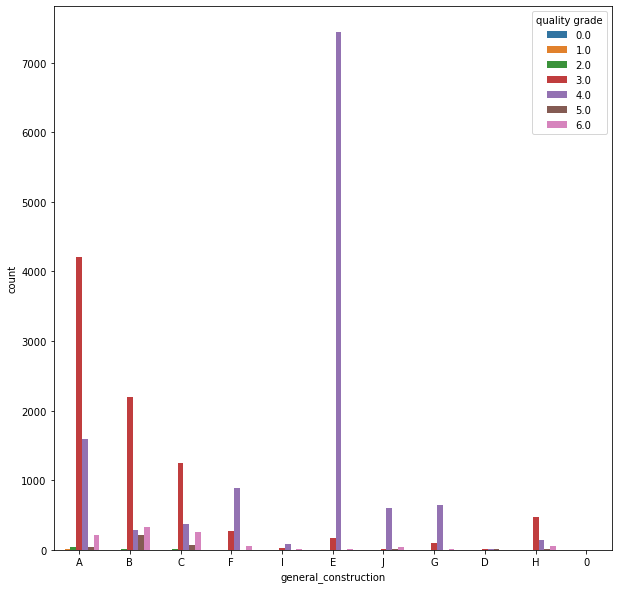

In [516]:
plt.figure(figsize=(10,10))
sns.countplot(x='general_construction',hue='quality_grade',data=df)
plt.legend(loc='upper right', title='quality grade')
plt.show()

No pattern was seen here. Several general constructions were using high quality material, such as general construction A, B, and C. But still, most of the properties built were using average and above average-quality material (3 and 4). General construction column will be dropped.

In [517]:
df[['quality_grade','interior_condition','exterior_condition']].corr(method='spearman')

,quality_grade,interior_condition,exterior_condition
quality_grade,1.000000,0.287107,0.283899
interior_condition,0.287107,1.000000,0.977947
exterior_condition,0.283899,0.977947,1.000000


Quality grade has 95% missing value and didn't correlate with interior or exterior condition. This column will be dropped.

In [518]:
df.groupby('exterior_condition')[['interior_condition']].median()

,interior_condition
exterior_condition,
0.0,0.0
1.0,1.0
2.0,2.0
3.0,3.0
4.0,4.0
5.0,5.0
6.0,6.0
7.0,7.0


However, interior and exterior condition is highly-correlated with each other. To make it simple, we can fill the missing value of one column with the existing value of the other column. And also, it is better to transform these columns into 1 column to represent the overall condition.

In [519]:
df['exterior_condition'].fillna(df['interior_condition'], inplace=True)
df['interior_condition'].fillna(df['exterior_condition'], inplace=True)

In [520]:
df[['exterior_condition','interior_condition']].isna().sum()

exterior_condition    25249
interior_condition    25249
dtype: int64

In [521]:
df['interior_condition'].isna().sum()/len(df)*100 # Percentage missing data

4.343420790069429

#### Overall Condition

In most cases, the interior and exterior conditions of the property are the same. But, sometimes, they don't. Since this columns are highly correlated with each other, dropping one of them will lose the information regarding the data with unmatched interior and exterior condition. So, we made a new column that can represents both condition.

In [522]:
df['overall_condition']=(df['interior_condition']+df['exterior_condition'])/2

In [523]:
df['overall_condition'].unique()

array([5. , 2. , 4. , 0. , 3. , 1. , nan, 3.5, 6. , 4.5, 7. , 2.5, 5.5,
       0.5, 1.5])

### Number of Rooms, Number of Bedrooms, Number of Bathrooms

In [524]:
df[['number_of_rooms','number_of_bedrooms','number_of_bathrooms']].describe()

,number_of_rooms,number_of_bedrooms,number_of_bathrooms
count,581310.000000,581310.000000,581310.000000
mean,3.776665,2.010932,0.763033
std,3.108430,1.661266,0.762545
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,6.000000,3.000000,1.000000
75%,6.000000,3.000000,1.000000
max,89.000000,93.000000,90.000000


In [525]:
df[['number_of_rooms','number_of_bedrooms','number_of_bathrooms']].isna().sum()

number_of_rooms        6
number_of_bedrooms     6
number_of_bathrooms    6
dtype: int64

In [526]:
i_nan_rooms=df[df['number_of_rooms'].isna()==True].index
print(df[df['number_of_bathrooms'].isna()].index)
print(df[df['number_of_bedrooms'].isna()].index)
print(df[df['number_of_rooms'].isna()].index)

Int64Index([2619, 11847, 32370, 529827, 536900, 540822], dtype='int64')
Int64Index([2619, 11847, 32370, 529827, 536900, 540822], dtype='int64')
Int64Index([2619, 11847, 32370, 529827, 536900, 540822], dtype='int64')


In [527]:
df.loc[i_nan_rooms][['number_of_bedrooms','number_of_rooms','number_of_bathrooms','zoning','building_code_description','category_code_description','location']]

,number_of_bedrooms,number_of_rooms,number_of_bathrooms,zoning,building_code_description,category_code_description,location
2619,NaN,NaN,NaN,RSA5,ROW W/GAR 4 STY MASONRY,Single Family,1434 S 04TH ST
11847,NaN,NaN,NaN,RSA5,VACANT LAND RESIDE < ACRE,Vacant Land,1008-10 S FAIRHILL ST
32370,NaN,NaN,NaN,RSA5,VACANT LAND RESIDE < ACRE,Vacant Land,303 GREEN ST
529827,NaN,NaN,NaN,SPAIR,CAR/TRUCK RENTAL MASONRY,Commercial,8101 BARTRAM AVE
536900,NaN,NaN,NaN,CMX2,VACANT LAND COMMER < ACRE,Vacant Land,1406-18 N FRONT ST
540822,NaN,NaN,NaN,CMX2,OFF BLD N/COM W/PKG MASON,Commercial,1919 COTTMAN AVE


#### Vacant Land

In [528]:
i_v_rooms=df[(df['number_of_rooms'].isna()==True)&(df['building_code_description'].str.contains('VACANT'))].index

In [529]:
#Change NaN value for vacant 0 to 0
df.loc[i_v_rooms,'number_of_rooms']=0
df.loc[i_v_rooms,'number_of_bedrooms']=0
df.loc[i_v_rooms,'number_of_bathrooms']=0
df.loc[[529827,540822],'number_of_bedrooms']=0

In [530]:
df[(df['number_of_rooms'].isna()==True)][['number_of_bedrooms','number_of_rooms','number_of_bathrooms','zoning','building_code_description','category_code_description','location']]

,number_of_bedrooms,number_of_rooms,number_of_bathrooms,zoning,building_code_description,category_code_description,location
2619,NaN,NaN,NaN,RSA5,ROW W/GAR 4 STY MASONRY,Single Family,1434 S 04TH ST
529827,0.0,NaN,NaN,SPAIR,CAR/TRUCK RENTAL MASONRY,Commercial,8101 BARTRAM AVE
540822,0.0,NaN,NaN,CMX2,OFF BLD N/COM W/PKG MASON,Commercial,1919 COTTMAN AVE


#### 0 rooms

In [531]:
len(df[df['number_of_rooms']==0])

223828

In [532]:
len(df[df['number_of_rooms']==0])/len(df)*100

38.50367098101549

In [533]:
df.reset_index(drop=True,inplace=True)

In [534]:
a=[]
for i in range(len(df)):
    if df['number_of_rooms'].loc[i]==0:
        x=df['number_of_bathrooms'].loc[i]+df['number_of_bedrooms'].loc[i]
        a.append(x)
    else:
        x=df['number_of_rooms'].loc[i]
        a.append(x)
len(a)

581316

In [535]:
df['number_of_rooms']=a
df['number_of_rooms']

0         7.0
1         4.0
2         5.0
3         8.0
4         6.0
         ... 
581311    0.0
581312    0.0
581313    0.0
581314    0.0
581315    0.0
Name: number_of_rooms, Length: 581316, dtype: float64

In [536]:
df[df['number_of_rooms']==0]['number_of_bedrooms'].sum()
df[df['number_of_rooms']==0]['number_of_bathrooms'].sum()

0.0

#### Other than Vacant Land, Parking Lot, etc

In [537]:
pd.set_option('display.max_rows',10)
df[(df['number_of_rooms']==0)&(~df['building_code_description'].str.contains('VACANT'))
  &(~df['building_code_description'].str.contains('PKG LOT'))&(~df['building_code_description'].str.contains('CAR LOT'))
   &(~df['building_code_description'].str.contains('PARKING'))&(~df['building_code_description'].str.contains('CEMET'))].head()

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
191,D,O50,ROW 3 STY MASONRY,1,Single Family,Y,45.41,2.0,0,13.5,...,NaN,I,1920,19147,RSA5,Residential Single Family,2016.0,2020-2016,0,2.0
192,D,O50,ROW 3 STY MASONRY,1,Single Family,N,82.00,4.0,0,13.0,...,NaN,I,1920,19147,RSA5,Residential Single Family,1977.0,1980-1976,0,4.0
193,D,O50,ROW 3 STY MASONRY,1,Single Family,N,82.79,4.0,0,13.0,...,NaN,I,1920,19147,RSA5,Residential Single Family,1978.0,1980-1976,0,4.0
229,0,P60,ROW W/GAR 3.5 STY MASONRY,1,Single Family,Y,54.00,3.0,0,20.0,...,000000C,I,2006,19147,I2,Industrial,2017.0,2020-2016,1,3.0
233,0,P60,ROW W/GAR 3.5 STY MASONRY,1,Single Family,Y,54.00,3.0,0,20.0,...,000000G,I,2006,19147,I2,Industrial,2015.0,2015-2011,1,3.0


In [538]:
pd.set_option('display.max_rows',10)
index_rooms0=df[(df['number_of_rooms']==0)&(~df['building_code_description'].str.contains('VACANT'))
                &(~df['building_code_description'].str.contains('PKG LOT'))&(~df['building_code_description'].str.contains('CAR LOT'))
                &(~df['building_code_description'].str.contains('PARKING'))&(~df['building_code_description'].str.contains('CEMET'))].index
index_rooms0

Int64Index([   191,    192,    193,    229,    233,    302,    355,    400,
               424,    429,
            ...
            581306, 581307, 581308, 581309, 581310, 581311, 581312, 581313,
            581314, 581315],
           dtype='int64', length=148156)

In [539]:
df.loc[index_rooms0,'number_of_rooms']=np.NaN

In [540]:
df['number_of_rooms']=df.groupby('building_code_description')['number_of_rooms'].apply(lambda x: x.fillna(x.median()))

In [541]:
df['number_of_rooms'].isna().sum()

3801

In [542]:
pd.set_option('display.max_rows',10)
df[df['number_of_rooms'].isna()==True]

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
400,0,Z10,MISC DWELL 1 STY MASONRY,1,Single Family,Y,69.25,4.0,0,14.00,...,NaN,I,1925,19147,RSA5,Residential Single Family,2018.0,2020-2016,1,4.0
30888,H,U80,ROW CONV/APT 4.5 STY MAS,2,Multi Family,N,125.00,3.0,0,20.54,...,NaN,I,1830,19106,RM1,Residential Multi Family,1964.0,1965-1961,0,3.0
31746,NaN,OA0,GAR W/COMM AREA MASONRY,4,Commercial,0,128.00,4.0,0,36.00,...,NaN,I,1920,19123,CMX25,Mixed Used,2017.0,2020-2016,0,4.0
31906,NaN,V31,PRIV GAR 2 STY MAS+OTH,1,Single Family,0,34.00,4.0,0,12.00,...,NaN,I,1920,19123,RSA5,Residential Single Family,1985.0,1985-1981,0,4.0
33239,NaN,NB0,PUB UTIL 2 STY MASONRY,4,Commercial,0,80.00,4.0,0,80.00,...,NaN,I,1915,19147,CMX4,Mixed Used,1930.0,1930-1926,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573128,NaN,6D0,COM CONDO 4 STY MASONRY,4,Commercial,0,0.00,3.0,0,0.00,...,000000B,I,1990,19146,RM1,Residential Multi Family,2016.0,2020-2016,0,3.0
573302,NaN,7,INDUS CONDO,5,Industrial,Y,0.00,5.0,0,0.00,...,00000WD,I,1900,19134,ICMX,Mixed Used,2004.0,2005-2001,0,5.0
577030,NaN,2,AIR RIGHTS RESIDENTIAL,1,Single Family,N,0.00,0.0,0,0.00,...,0000UTL,I,1900,19125,IRMX,Mixed Used,2008.0,2010-2006,0,0.0
580789,NaN,ZE0,MISC ADMIN BLDG MASONRY,4,Commercial,0,0.00,4.0,0,0.00,...,NaN,I,1972,19114,RM2,Residential Multi Family,1972.0,1975-1971,0,4.0


This 3801 rows data should be drop, since it cannot be filled with median.

#### 0 bedrooms

In [543]:
pd.set_option('display.max_rows',10)
df[(df['number_of_bedrooms']==0)&(~df['building_code_description'].str.contains('VACANT'))
  &(~df['building_code_description'].str.contains('WAREHOUSE'))&(~df['building_code_description'].str.contains('PKG LOT'))
  &(~df['building_code_description'].str.contains('CAR LOT'))&(~df['building_code_description'].str.contains('PARKING'))
  &(~df['building_code_description'].str.contains('CEMET'))&(~df['building_code_description'].str.contains('AMUSE'))
  &(~df['category_code_description'].str.contains('Indus'))&(~df['category_code_description'].str.contains('Comm'))][['number_of_bedrooms','number_of_rooms','number_of_bathrooms','zoning','building_code_description','category_code_description','location']]

,number_of_bedrooms,number_of_rooms,number_of_bathrooms,zoning,building_code_description,category_code_description,location
177,0.0,6.0,1.0,RSA5,ROW 2 STY MASONRY,Single Family,252 WILDER ST
191,0.0,6.0,0.0,RSA5,ROW 3 STY MASONRY,Single Family,130 GREENWICH ST
192,0.0,6.0,0.0,RSA5,ROW 3 STY MASONRY,Single Family,132 GREENWICH ST
193,0.0,6.0,0.0,RSA5,ROW 3 STY MASONRY,Single Family,134 GREENWICH ST
229,0.0,6.0,0.0,I2,ROW W/GAR 3.5 STY MASONRY,Single Family,120 DICKINSON ST
...,...,...,...,...,...,...,...
581311,0.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST
581312,0.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST
581313,0.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST
581314,0.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST


In [544]:
i_bed_0=df[(df['number_of_bedrooms']==0)&(~df['building_code_description'].str.contains('VACANT'))
  &(~df['building_code_description'].str.contains('WAREHOUSE'))&(~df['building_code_description'].str.contains('PKG LOT'))
  &(~df['building_code_description'].str.contains('CAR LOT'))&(~df['building_code_description'].str.contains('PARKING'))
  &(~df['building_code_description'].str.contains('CEMET'))&(~df['building_code_description'].str.contains('AMUSE'))
  &(~df['category_code_description'].str.contains('Indus'))&(~df['category_code_description'].str.contains('Comm'))].index
i_bed_0

Int64Index([   177,    191,    192,    193,    229,    233,    302,    355,
               400,    424,
            ...
            581306, 581307, 581308, 581309, 581310, 581311, 581312, 581313,
            581314, 581315],
           dtype='int64', length=141119)

In [545]:
df.loc[i_bed_0,'number_of_bedrooms']=np.NaN

In [546]:
df['number_of_bedrooms']=df.groupby('building_code_description')['number_of_bedrooms'].apply(lambda x: x.fillna(x.median()))

In [547]:
df['number_of_bedrooms'].isna().sum()

470

This 470 rows data should be drop, since it cannot be filled with median.

#### 0 bathrooms

In [548]:
pd.set_option('display.max_rows',10)
df[(df['number_of_bathrooms']==0)&(~df['building_code_description'].str.contains('VACANT'))
   &(~df['building_code_description'].str.contains('PKG LOT'))&(~df['building_code_description'].str.contains('CAR LOT'))
   &(~df['building_code_description'].str.contains('PARKING'))&(~df['building_code_description'].str.contains('CEMET'))
  ][['number_of_bedrooms','number_of_rooms','number_of_bathrooms','zoning','building_code_description','category_code_description','location']]

,number_of_bedrooms,number_of_rooms,number_of_bathrooms,zoning,building_code_description,category_code_description,location
63,3.0,6.0,0.0,ICMX,ROW W/GAR 3 STY MAS+OTHER,Single Family,134 REED ST
64,3.0,6.0,0.0,ICMX,ROW W/GAR 3 STY MAS+OTHER,Single Family,136 REED ST
65,3.0,6.0,0.0,ICMX,ROW W/GAR 3 STY MAS+OTHER,Single Family,138 REED ST
67,3.0,6.0,0.0,ICMX,ROW W/GAR 3 STY MAS+OTHER,Single Family,142 REED ST
191,3.0,6.0,0.0,RSA5,ROW 3 STY MASONRY,Single Family,130 GREENWICH ST
...,...,...,...,...,...,...,...
581311,2.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST
581312,2.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST
581313,2.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST
581314,2.0,3.0,0.0,RMX3,RES CONDO 5+ STY MASONRY,Single Family,237-47 S 18TH ST


In [549]:
i_bath_0=df[(df['number_of_bathrooms']==0)&(~df['building_code_description'].str.contains('VACANT'))
   &(~df['building_code_description'].str.contains('PKG LOT'))&(~df['building_code_description'].str.contains('CAR LOT'))
   &(~df['building_code_description'].str.contains('PARKING'))&(~df['building_code_description'].str.contains('CEMET'))
  ].index
i_bath_0

Int64Index([    63,     64,     65,     67,    191,    192,    193,    196,
               229,    233,
            ...
            581306, 581307, 581308, 581309, 581310, 581311, 581312, 581313,
            581314, 581315],
           dtype='int64', length=158985)

In [550]:
df.loc[i_bath_0,'number_of_bathrooms']=np.NaN

In [551]:
df['number_of_bathrooms']=df.groupby('building_code_description')['number_of_bathrooms'].apply(lambda x: x.fillna(x.median()))

In [552]:
df['number_of_bathrooms'].isna().sum()

5201

This 5201 rows data should be drop, since it cannot be filled with median.

#### Total rooms < Bedroom + Bathroom

In [553]:
b=df['number_of_rooms']<(df['number_of_bedrooms']+df['number_of_bathrooms'])
b

0         False
1         False
2         False
3         False
4         False
          ...  
581311    False
581312    False
581313    False
581314    False
581315    False
Length: 581316, dtype: bool

In [554]:
df.loc[b[b==True].index]

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
33,I,O50,ROW 3 STY MASONRY,1,Single Family,Y,36.0,3.0,0,34.00,...,NaN,I,2008,19147,RSA5,Residential Single Family,2018.0,2020-2016,0,3.0
34,A,O50,ROW 3 STY MASONRY,1,Single Family,Y,36.0,1.0,0,34.00,...,NaN,I,2009,19147,RSA5,Residential Single Family,2016.0,2020-2016,0,1.0
62,A,P51,ROW W/GAR 3 STY MAS+OTHER,1,Single Family,Y,84.0,1.0,0,16.67,...,NaN,I,2014,19148,ICMX,Mixed Used,2014.0,2015-2011,1,1.0
66,A,P51,ROW W/GAR 3 STY MAS+OTHER,1,Single Family,Y,84.0,1.0,0,16.67,...,NaN,I,2014,19148,ICMX,Mixed Used,2014.0,2015-2011,1,1.0
206,D,P50,ROW W/GAR 3 STY MASONRY,1,Single Family,N,82.0,4.0,0,32.00,...,NaN,I,1925,19147,RSA5,Residential Single Family,1973.0,1975-1971,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579974,0,530,RES CONDO 2 STY MASONRY,1,Single Family,Y,0.0,4.0,0,0.00,...,0000056,I,1980,19154,RM2,Residential Multi Family,2014.0,2015-2011,0,4.0
580262,NaN,590,RES CONDO 5+ STY MASONRY,1,Single Family,Y,0.0,4.0,0,0.00,...,000003B,C,1910,19103,RMX3,Mixed Used,1999.0,2000-1996,1,4.0
580951,NaN,551,RES CONDO 3 STY MAS+OTH,1,Single Family,0,0.0,4.0,0,0.00,...,000025E,I,1960,19136,RM2,Residential Multi Family,2008.0,2010-2006,1,4.0
581176,NaN,570,RES CONDO 4 STY MASONRY,1,Single Family,Y,0.0,3.0,0,0.00,...,0000213,I,2008,19111,RSD3,Residential Single Family,2019.0,2020-2016,1,3.0


In [555]:
c=[]
for i in range(len(df)):
    if df['number_of_rooms'].loc[i]<(df['number_of_bedrooms'].loc[i]+df['number_of_bathrooms'].loc[i]):
        x=df['number_of_bathrooms'].loc[i]+df['number_of_bedrooms'].loc[i]
        c.append(x)
    else:
        x=df['number_of_rooms'].loc[i]
        c.append(x)
len(c)

581316

In [556]:
df['number_of_rooms']=c
df['number_of_rooms']

0         7.0
1         4.0
2         5.0
3         8.0
4         6.0
         ... 
581311    3.0
581312    3.0
581313    3.0
581314    3.0
581315    3.0
Name: number_of_rooms, Length: 581316, dtype: float64

In [557]:
b=df['number_of_rooms']<(df['number_of_bedrooms']+df['number_of_bathrooms'])
b

0         False
1         False
2         False
3         False
4         False
          ...  
581311    False
581312    False
581313    False
581314    False
581315    False
Length: 581316, dtype: bool

In [558]:
b[b==True].index

Int64Index([], dtype='int64')

In [559]:
df[['number_of_rooms','number_of_bedrooms','number_of_bathrooms']].isna().sum()

number_of_rooms        3801
number_of_bedrooms      470
number_of_bathrooms    5201
dtype: int64

### Frontage, Depth, Total Area and Total Livable Area

In [560]:
df[['depth','frontage','total_area','total_livable_area']].describe()

,depth,frontage,total_area,total_livable_area
count,5.813150e+05,5.813150e+05,5.813150e+05,5.813100e+05
mean,1.110795e+02,1.098565e+03,5.045587e+03,2.258814e+03
std,4.271169e+03,5.842341e+05,2.965255e+05,1.681276e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.700000e+01,1.500000e+01,8.824500e+02,1.025000e+03
50%,7.700000e+01,1.600000e+01,1.280000e+03,1.230000e+03
75%,1.000000e+02,2.041000e+01,2.050915e+03,1.588000e+03
max,1.829520e+06,4.320260e+08,2.076941e+08,2.500000e+06


In [561]:
df[['depth','frontage','total_area','total_livable_area']].isna().sum()

depth                 1
frontage              1
total_area            1
total_livable_area    6
dtype: int64

<AxesSubplot:>

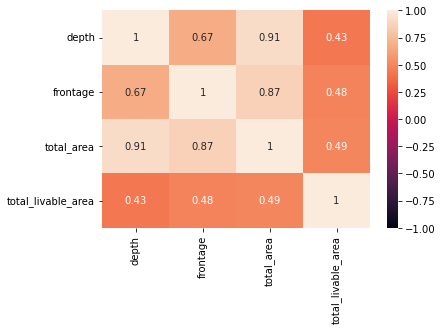

In [562]:
corr2=df[['depth','frontage','total_area','total_livable_area']].corr('spearman')
sns.heatmap(corr2, vmin=-1, vmax=1, annot=True)

#### Frontage

In [563]:
# Check index for NaN data 
df[df['frontage'].isna()==True].index

Int64Index([540700], dtype='int64')

In [564]:
df[df['frontage']==0]['frontage'].count()

35036

#### Depth

In [565]:
# Check index for NaN data 
na_depth=df[df['depth'].isna()==True].index

In [566]:
# Showing NaN data
df.loc[na_depth]

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
540700,NaN,DE0,OFF BLD N/COM W/PKG MASON,4,Commercial,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,19111,CMX2,Mixed Used,2019.0,2020-2016,0,NaN


In [567]:
# Check whether there are any 0 value on depth
df[df['depth']==0]['depth'].count()

35075

#### Total Area

In [568]:
df[df['total_area'].isna()==True].index

Int64Index([540700], dtype='int64')

In [569]:
df[df['total_area']==0]['total_area'].count()

34901

#### Crosschecking

In [570]:
df[(df['depth']<100)&(df['depth']>0)][['depth','frontage','total_area']]

,depth,frontage,total_area
0,49.0,15.90,779.0
1,49.0,15.90,779.1
2,49.0,14.80,725.2
6,75.0,16.00,1200.0
7,90.0,29.17,2625.3
...,...,...,...
578724,62.0,16.80,1041.6
578725,62.0,16.80,1041.6
578726,45.0,18.00,810.0
578727,45.0,18.00,810.0


Total area is the multiplication of depth and frontage. Let's check the 0 value of total area.

In [571]:
df2=df[(df['total_area']==0)][['depth','frontage','total_area']].reset_index(drop=True)

In [572]:
df2.head()

,depth,frontage,total_area
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [573]:
df2['depth']=df2['depth'].apply(lambda x: np.NaN if x==0 else x)
df2['frontage']=df2['frontage'].apply(lambda x: np.NaN if x==0 else x)
df2['total_area']=df2['total_area'].apply(lambda x: np.NaN if x==0 else x)

In [574]:
df2.isna().sum()

depth         34901
frontage      34898
total_area    34901
dtype: int64

In [575]:
df2[df2['frontage'].notna()]

,depth,frontage,total_area
279,NaN,29.34,NaN
466,NaN,350.00,NaN
467,NaN,500.00,NaN


This indicates that total area of 0 is resulting from 0 depth and 0 frontage. Since there's no other way to fill total area, let's drop these columns.

In [576]:
total_area_0=df[(df['total_area']==0)].index

In [577]:
df.drop(index=total_area_0,inplace=True)

In [578]:
df=df.reset_index(drop=True)

Let's check unmatched data of total area with the multiplication of depth and frontage.

In [579]:
a=[]
for i in range(len(df)):
    if df['frontage'].loc[i]*df['depth'].loc[i]!=df['total_area'].loc[i]:
        a.append(i)
len(a)

156763

In [580]:
df.loc[a][['depth','frontage','total_area','total_livable_area','number_stories','building_code_description','category_code_description']]

,depth,frontage,total_area,total_livable_area,number_stories,building_code_description,category_code_description
0,49.00,15.90,779.00,1650.0,0.0,ROW W/GAR 3 STY MASONRY,Single Family
10,90.00,18.08,1627.20,1266.0,2.0,ROW B/GAR 2 STY MASONRY,Single Family
24,48.00,15.41,739.68,1436.0,3.0,ROW 3 STY MASONRY,Single Family
31,45.46,20.00,909.00,2162.0,3.0,ROW W/GAR 3 STY MASONRY,Single Family
36,44.75,15.50,693.62,1024.0,2.0,ROW 2 STY MASONRY,Single Family
...,...,...,...,...,...,...,...
546404,77.75,17.67,1373.61,1624.0,3.0,RES CONDO 3 STY MAS+OTH,Single Family
546405,77.75,17.67,1373.61,792.0,3.0,RES CONDO 3 STY MAS+OTH,Single Family
546406,77.75,17.67,1373.61,1111.0,3.0,RES CONDO 3 STY MAS+OTH,Single Family
546408,62.00,16.80,1041.60,1854.0,3.0,RES CONDO 3 STY MAS+OTH,Single Family


Delete rows when depth or frontage is larger than total area.

In [581]:
drop2=df[(df['depth']>df['total_area'])|(df['frontage']>df['total_area'])].index

In [582]:
df.drop(index=drop2,inplace=True)

In [583]:
df.reset_index(drop=True,inplace=True)

In [584]:
df['total_area'].describe()

count    5.463520e+05
mean     5.366703e+03
std      3.058627e+05
min      1.000000e+00
25%      9.500400e+02
50%      1.349545e+03
75%      2.179000e+03
max      2.076941e+08
Name: total_area, dtype: float64

<AxesSubplot:>

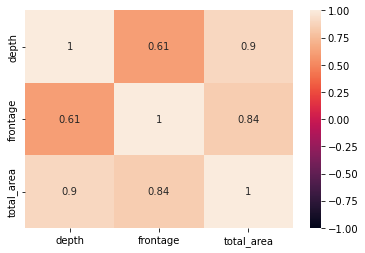

In [585]:
corr2=df[['depth','frontage','total_area']].corr('spearman')
sns.heatmap(corr2, vmin=-1, vmax=1, annot=True)

#### Total Livable Area

In [586]:
i_nan_liv=df[df['total_livable_area'].isna()==True].index

In [587]:
df.loc[i_nan_liv][['total_area','zoning','building_code_description','category_code_description']]
# Vacant Land will not have any livable area, commercial too

,total_area,zoning,building_code_description,category_code_description
2614,640.00,RSA5,ROW W/GAR 4 STY MASONRY,Single Family
11830,437.40,RSA5,VACANT LAND RESIDE < ACRE,Vacant Land
32320,3390.34,RSA5,VACANT LAND RESIDE < ACRE,Vacant Land
529198,1268182.35,SPAIR,CAR/TRUCK RENTAL MASONRY,Commercial
536214,8610.00,CMX2,VACANT LAND COMMER < ACRE,Vacant Land
539996,NaN,CMX2,OFF BLD N/COM W/PKG MASON,Commercial


In [588]:
i_nanto0=df[(df['total_livable_area'].isna()==True)&((df['category_code_description'].str.contains('Vacant'))|(df['category_code_description'].str.contains('Comm')))].index

In [589]:
df.loc[i_nanto0,'total_livable_area']=0

In [590]:
df[df['total_livable_area'].isna()==True].index

Int64Index([2614], dtype='int64')

In [591]:
pd.set_option('display.max_rows',603)
df[(df['total_livable_area']==0)&(~df['building_code_description'].str.contains('VACANT'))&(~df['building_code_description'].str.contains('WAREHOUSE'))&(~df['building_code_description'].str.contains('PKG LOT'))
  &(~df['building_code_description'].str.contains('CAR LOT'))&(~df['category_code_description'].str.contains('Commercial'))
  &(~df['category_code_description'].str.contains('Indus'))
  &(~df['building_code_description'].str.contains('PARKING'))]

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
1975,0,V10,PRIV GAR 1 STY MASONRY,1,Single Family,0,49.77,5.0,0,15.91,...,NaN,I,1925,19148,RSA5,Residential Single Family,2005.0,2005-2001,2,5.0
3158,D,V10,PRIV GAR 1 STY MASONRY,1,Single Family,N,75.00,4.0,0,38.00,...,NaN,I,1920,19147,RSA5,Residential Single Family,1918.0,1920-1916,0,4.0
6797,D,V10,PRIV GAR 1 STY MASONRY,1,Single Family,N,56.45,4.0,0,16.00,...,NaN,I,1920,19148,RSA5,Residential Single Family,2008.0,2010-2006,1,4.0
7333,NaN,P50,ROW W/GAR 3 STY MASONRY,1,Single Family,Y,45.00,1.0,0,14.00,...,NaN,I,2018,19147,CMX3,Mixed Used,2011.0,2015-2011,1,1.0
7440,NaN,O30,ROW 2 STY MASONRY,1,Single Family,0,45.66,0.0,0,14.00,...,NaN,NaN,1920,19147,RSA5,Residential Single Family,1983.0,1985-1981,1,0.0
9517,NaN,P50,ROW W/GAR 3 STY MASONRY,1,Single Family,0,70.00,0.0,0,16.00,...,NaN,NaN,0000,19147,RSA5,Residential Single Family,2010.0,2010-2006,1,0.0
10387,A,O50,ROW 3 STY MASONRY,1,Single Family,Y,58.00,1.0,0,14.75,...,NaN,I,2018,19147,RSA5,Residential Single Family,2018.0,2020-2016,0,1.0
11297,NaN,O10,ROW 1 STY MASONRY,1,Single Family,Y,58.00,4.0,0,15.66,...,NaN,I,1920,19147,RSA5,Residential Single Family,2020.0,2020-2016,1,4.0
11788,NaN,O50,ROW 3 STY MASONRY,1,Single Family,0,37.00,6.0,0,14.66,...,NaN,I,1918,19147,RSA5,Residential Single Family,2015.0,2015-2011,0,6.0
11831,NaN,O50,ROW 3 STY MASONRY,1,Single Family,0,37.00,4.0,0,14.66,...,NaN,I,1918,19147,RSA5,Residential Single Family,2019.0,2020-2016,0,4.0


In [592]:
lv_otoNAN=df[(df['total_livable_area']==0)&(~df['building_code_description'].str.contains('VACANT'))&(~df['building_code_description'].str.contains('WAREHOUSE'))&(~df['building_code_description'].str.contains('PKG LOT'))
  &(~df['building_code_description'].str.contains('CAR LOT'))&(~df['category_code_description'].str.contains('Commercial'))
  &(~df['category_code_description'].str.contains('Indus'))
  &(~df['building_code_description'].str.contains('PARKING'))].index

In [593]:
df.loc[lv_otoNAN,'total_livable_area']=np.NaN

In [594]:
df[df['total_livable_area'].isna()==True].index

Int64Index([  1975,   2614,   3158,   6797,   7333,   7440,   9517,  10387,
             11297,  11788,
            ...
            544009, 544012, 544013, 544014, 544184, 544185, 544257, 544551,
            544894, 545162],
           dtype='int64', length=427)

There are 427 NaN data that will be changed using median data which grouped by building code.

In [595]:
df['total_livable_area']=df.groupby('building_code_description')['total_livable_area'].apply(lambda x: x.fillna(x.median()))

In [596]:
df['total_livable_area'].isna().sum()

26

### Number Stories

In [597]:
df['number_stories'].unique()

array([ 0.,  2.,  3.,  4.,  1., nan,  5.,  6.,  9.,  8., 11.,  7., 40.,
       20., 30., 22., 15., 14., 10., 12., 16., 13., 19., 17., 18., 28.,
       25., 24., 37., 34., 21., 26., 27., 23., 33., 39., 61., 32., 51.,
       45., 54., 41., 29., 58., 44., 43., 36.])

In [598]:
df['number_stories'].describe()

count    546347.000000
mean          1.643223
std           1.102851
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          61.000000
Name: number_stories, dtype: float64

In [599]:
df['number_stories'].isna().sum()

6

<AxesSubplot:>

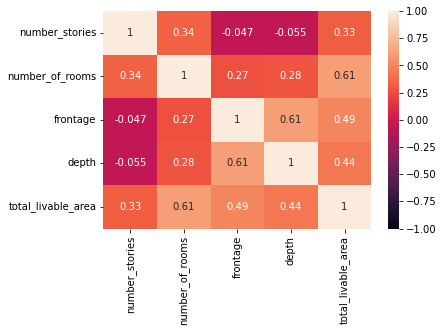

In [600]:
corr3=df[['number_stories','number_of_rooms','frontage','depth','total_livable_area']].corr('spearman')
sns.heatmap(corr3, vmin=-1, vmax=1, annot=True)

In [601]:
df[df['number_stories'].isna()==True].index

Int64Index([2614, 11830, 32320, 529198, 536214, 539996], dtype='int64')

In [602]:
df[df['number_stories'].isna()==True][['number_stories','number_of_rooms','building_code_description','category_code_description','zoning']]

,number_stories,number_of_rooms,building_code_description,category_code_description,zoning
2614,NaN,7.0,ROW W/GAR 4 STY MASONRY,Single Family,RSA5
11830,NaN,0.0,VACANT LAND RESIDE < ACRE,Vacant Land,RSA5
32320,NaN,0.0,VACANT LAND RESIDE < ACRE,Vacant Land,RSA5
529198,NaN,NaN,CAR/TRUCK RENTAL MASONRY,Commercial,SPAIR
536214,NaN,0.0,VACANT LAND COMMER < ACRE,Vacant Land,CMX2
539996,NaN,4.0,OFF BLD N/COM W/PKG MASON,Commercial,CMX2


In [603]:
df.loc[df[(df['number_stories'].isna()==True) & (df['category_code_description']=='Vacant Land')].index,'number_stories']=0

In [604]:
df[df['number_stories'].isna()==True][['number_stories','number_of_rooms','building_code_description','category_code_description','zoning']]

,number_stories,number_of_rooms,building_code_description,category_code_description,zoning
2614,NaN,7.0,ROW W/GAR 4 STY MASONRY,Single Family,RSA5
529198,NaN,NaN,CAR/TRUCK RENTAL MASONRY,Commercial,SPAIR
539996,NaN,4.0,OFF BLD N/COM W/PKG MASON,Commercial,CMX2


In [605]:
df[(df['number_stories']==0)
   &(~df['building_code_description'].str.contains('VACANT'))
   &(~df['building_code_description'].str.contains('CEMET'))
   &(~df['building_code_description'].str.contains('AMUSE'))
   &(~df['building_code_description'].str.contains('PKG LOT'))
   &(~df['building_code_description'].str.contains('CAR LOT'))
   &(~df['building_code_description'].str.contains('PARKING'))]

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
0,D,P50,ROW W/GAR 3 STY MASONRY,1,Single Family,N,49.0,5.0,0,15.9,...,NaN,I,1920,19147,RSA5,Residential Single Family,1951.0,1955-1951,1,5.0
1,D,O50,ROW 3 STY MASONRY,1,Single Family,Y,49.0,2.0,0,15.9,...,NaN,I,1920,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,2.0
140,0,R70,ROW B/GAR 4 STY MASONRY,1,Single Family,Y,64.0,4.0,0,15.0,...,NaN,I,2008,19147,RSA5,Residential Single Family,2016.0,2020-2016,1,4.0
141,0,R70,ROW B/GAR 4 STY MASONRY,1,Single Family,Y,64.0,4.0,0,15.0,...,NaN,I,2007,19147,RSA5,Residential Single Family,2014.0,2015-2011,1,4.0
142,0,R70,ROW B/GAR 4 STY MASONRY,1,Single Family,Y,64.0,4.0,0,16.0,...,NaN,I,2006,19147,RSA5,Residential Single Family,2007.0,2010-2006,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546227,NaN,551,RES CONDO 3 STY MAS+OTH,1,Single Family,Y,0.0,3.0,1,0.0,...,NaN,I,1900,19104,RSA5,Residential Single Family,2013.0,2015-2011,1,3.0
546275,NaN,550,RES CONDO 3 STY MASONRY,1,Single Family,Y,100.0,1.0,0,120.0,...,0000004,I,2016,19125,RSA5,Residential Single Family,2016.0,2020-2016,0,1.0
546276,NaN,550,RES CONDO 3 STY MASONRY,1,Single Family,Y,1.0,1.0,0,1143.0,...,0000001,I,2012,19123,RSA5,Residential Single Family,2019.0,2020-2016,1,1.0
546314,E,550,RES CONDO 3 STY MASONRY,1,Single Family,Y,1.0,3.0,0,1193.0,...,0000001,I,1920,19130,RM1,Residential Multi Family,2017.0,2020-2016,1,3.0


In [606]:
i_str_0=df[(df['number_stories']==0)
   &(~df['building_code_description'].str.contains('VACANT'))
   &(~df['building_code_description'].str.contains('CEMET'))
   &(~df['building_code_description'].str.contains('AMUSE'))
   &(~df['building_code_description'].str.contains('PKG LOT'))
   &(~df['building_code_description'].str.contains('CAR LOT'))
   &(~df['building_code_description'].str.contains('PARKING'))].index
i_str_0

Int64Index([     0,      1,    140,    141,    142,    172,    202,    205,
               206,    225,
            ...
            545709, 545710, 545711, 545712, 545938, 546227, 546275, 546276,
            546314, 546319],
           dtype='int64', length=85745)

In [607]:
df.loc[i_str_0,'number_stories']=np.NaN

In [608]:
df['number_stories']=df.groupby('building_code_description')['number_stories'].apply(lambda x: x.fillna(x.median()))

In [609]:
df['number_stories'].isna().sum()

96

### Topography and View Type

#### Topography

In [610]:
df['topography'].value_counts()

F    500814
A     30310
E      4817
B       251
C       173
D       113
0        24
Name: topography, dtype: int64

In [611]:
df['topography'].isna().sum()

9851

In [612]:
df['topography'].isna().sum()/len(df)*100 # Percentage missing value

1.8030467481646482

#### View Type

In [613]:
df['view_type'].value_counts()

I    497440
A     10672
C      5132
D      4010
0      3950
H      2710
E      2079
B       175
Name: view_type, dtype: int64

In [614]:
df['view_type'].isna().sum()

20185

In [615]:
df['view_type'].isna().sum()/len(df)*100 # Percentage missing value

3.6944978795760255

#### Number Stories and View Type

Does the elevation of the property affects its view type?

In [616]:
df[df['number_stories']==0]['view_type'].value_counts()

I    26102
0      715
D      148
A      145
E       50
C       28
H        9
B        5
Name: view_type, dtype: int64

In [617]:
df[(df['number_stories']==0)&(df['view_type']=='A')][['location','building_code_description','number_stories','category_code']]

,location,building_code_description,number_stories,category_code
20321,6218 CARPENTER ST,VACANT LAND RESIDE < ACRE,0.0,6
21028,5405R VINE ST,VACANT LAND RESIDE < ACRE,0.0,6
23267,1615 N CONESTOGA ST,VACANT LAND RESIDE < ACRE,0.0,6
37875,4127 MANTUA AVE,VACANT LAND RESIDE < ACRE,0.0,6
39994,1218 N 41ST ST,VACANT LAND RESIDE < ACRE,0.0,6
40338,446 E INDIANA AVE,VACANT LAND RESIDE < ACRE,0.0,6
40400,233 E INDIANA AVE,VACANT LAND RESIDE < ACRE,0.0,6
40616,515 E INDIANA AVE,VACANT LAND RESIDE < ACRE,0.0,6
40617,533 E INDIANA AVE,VACANT LAND RESIDE < ACRE,0.0,6
40620,543 E INDIANA AVE,VACANT LAND RESIDE < ACRE,0.0,6


Reasonable explanation about this is maybe because an unit of apartment only have 1 floor technically even if the building have more than 1 floor. So, it indicates the floor count of the property, not the building entirely.

In [618]:
df[df['number_stories']>0]['view_type'].value_counts()

I    471246
A     10527
C      5102
D      3862
0      3234
H      2701
E      2029
B       169
Name: view_type, dtype: int64

Thus, we can't detect anomalies in view type using number stories column. 

#### View Type and Topography

Logically, the terrain of the area won't affect the view type. But, let's just check to make sure.

In [619]:
df.groupby('topography')['view_type'].value_counts()

topography  view_type
0           0                12
A           I             28056
            C               826
            A               686
            H               237
            D               133
            E                70
            0                17
            B                 1
B           C               148
            I                89
            A                 2
            E                 2
            D                 1
            H                 1
C           I                51
            B                43
            E                32
            A                29
            C                 9
            D                 1
            H                 1
D           I                97
            A                12
            C                 1
            D                 1
E           I              4144
            H               287
            A               203
            D                33
            E     

In [620]:
df['topography'].mode()

0    F
dtype: object

Floodplain topography (C) have comparable counts of typical (I) and flowing water (C). However, to fill the Nan value in topography based on its view type, especially filling with Floodplain, will be dangerous assumption to be made. I think it's better to fill it with F (street level).

In [621]:
df['topography'].fillna('F',inplace=True)

In [622]:
df['topography'].isna().sum()

0

#### View Type and Zoning

The most logically sound to fill the view type is to match it with its zoning. Since our view is determined by surrounding environments.

In [623]:
df.groupby('new_zoning')['view_type'].value_counts()

new_zoning                          view_type
Commercial                          I              1064
                                    D                54
                                    0                33
                                    A                 6
                                    C                 3
                                    E                 3
                                    B                 1
Industrial                          I              3646
                                    0               149
                                    E               120
                                    D                30
                                    A                22
                                    B                 4
                                    C                 4
                                    H                 2
Mixed Used                          I             33146
                                    D              1586
  

Typical view type is just too dominating.

In [624]:
df['view_type'].fillna('I',inplace=True)

In [625]:
df['view_type'].isna().sum()

0

## Property Administration Information

### Recording Date

In [626]:
df['recording_date'].dtypes

dtype('O')

In [627]:
df = df.astype({'recording_date':'datetime64[ns]'})

In [628]:
df['recording_date'].isna().sum()

12

In [629]:
df[['recording_date','sale_date']]

,recording_date,sale_date
0,1951-01-31,1951-01-31
1,2017-05-09,2017-04-14
2,1975-09-04,1975-09-04
3,2012-02-16,2012-02-16
4,2017-07-31,2017-07-21
...,...,...
546348,2015-09-09,2015-09-04
546349,2018-12-19,2018-12-14
546350,2020-02-21,2019-12-30
546351,1998-05-07,1998-04-03


In [630]:
len(df[df['recording_date']!=df['sale_date']])

472722

In [631]:
df[df['recording_date']!=df['sale_date']][['recording_date','sale_date']]

,recording_date,sale_date
1,2017-05-09,2017-04-14
4,2017-07-31,2017-07-21
5,2006-03-02,2006-02-27
7,1999-03-24,1999-03-22
8,2019-08-06,2019-07-17
...,...,...
546348,2015-09-09,2015-09-04
546349,2018-12-19,2018-12-14
546350,2020-02-21,2019-12-30
546351,1998-05-07,1998-04-03


Recording dates weren't really different with sale dates. It's better to use sale date with complete data. 

### Year Built

In [632]:
df['year_built'].dtypes

dtype('O')

In [633]:
df['year_built'].unique()

array(['1920', '0000', '1960', '1987', '2016', '2018', '2008', '2009',
       '2014', '2019', '1924', '1900', '1915', '1854', '2011', '1955',
       '1954', '1939', '1929', '2007', '2006', '2010', '1925', '1945',
       '1902', '1944', '1981', '2005', '2004', '1904', '1930', '1965',
       '1906', '2003', '1991', '1997', '1990', '1994', '2017', '2015',
       '1918', '2013', '2012', '1948', '1980', '1907', '1931', '1916',
       '1940', '1972', '1905', '1926', '2002', '1988', '1949', '1951',
       '1950', '1941', '1910', '1921', '1914', '1874', '1936', '1923',
       '1932', '1935', '1933', '1956', '1927', '1934', '1919', '1996',
       '1908', '1894', '1866', nan, '1879', '1814', '1917', '1977',
       '1985', '1943', '1903', '1969', '1946', '1942', '1896', '1984',
       '1970', '1890', '1789', '1855', '1897', '2000', '1952', '2001',
       '1880', '1870', '1989', '1959', '1860', '1840', '1975', '1999',
       '1856', '1792', '1912', '1928', '1832', '1865', '1983', '1835',
       '1

In [634]:
df = df.astype({'year_built': float})

ValueError: could not convert string to float: '196Y'

In [635]:
df[df['year_built']=='196Y']

,basements,building_code,building_code_description,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,...,unit,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition
35985,A,U70,ROW CONV/APT 4 STY MASON,2,Multi Family,Y,26.39,4.0,0,22.21,...,NaN,I,196Y,19123,RSA5,Residential Single Family,2019.0,2020-2016,1,4.0


In [636]:
# Change '196Y' become 1960 since Y is typo
index=df[df['year_built']=='196Y'].index
df.at[index,'year_built']=1960

In [637]:
# Changing column properties (cannot change to integer because of NaN)
df = df.astype({'year_built': float})

In [638]:
df['year_built'].describe()

count    546347.000000
mean       1772.411619
std         538.052928
min           0.000000
25%        1920.000000
50%        1925.000000
75%        1950.000000
max        2020.000000
Name: year_built, dtype: float64

We have 0 and 9150 which are anomalies.

In [639]:
len(df[df['year_built']==0])

46012

In [640]:
len(df[df['year_built']>2020])

0

In [641]:
i_YB_1950=df[df['year_built']>2020].index
df.loc[i_YB_1950,'year_built']=1950

In [642]:
pd.set_option('display.max_rows',10)
df1=df[(df['year_built']==0)&(~df['building_code_description'].str.contains('VACANT'))&(~df['building_code_description'].str.contains('PKG'))&(~df['building_code_description'].str.contains('PARKING'))]

In [643]:
rules=dict(df1.groupby('location')['year_built'].agg(pd.Series.mean))
rules

{'1 N 30TH ST': 0.0,
 '1 S CHRIS COLUMBUS BLVD': 0.0,
 '1 WASHINGTON AVE': 0.0,
 '100 CARPENTER LN': 0.0,
 '100 E GODFREY AVE': 0.0,
 '100 EMILY ST': 0.0,
 '100 SPRING LN': 0.0,
 '100 SUMAC ST': 0.0,
 '1000 OAK LN': 0.0,
 '1000 W GLENWOOD AVE': 0.0,
 '1000 W TABOR RD': 0.0,
 '1000R E WYOMING AVE': 0.0,
 '1001 70TH AVE': 0.0,
 '1001 LONGSHORE AVE': 0.0,
 '1001 ST VINCENT ST': 0.0,
 '1001 W WINGOHOCKING ST': 0.0,
 '1001-19 N 5TH ST': 0.0,
 '1004-06 WOOD ST': 0.0,
 '1005 NEW MARKET ST': 0.0,
 '1006 N 40TH ST': 0.0,
 '1006-10 W YORK ST': 0.0,
 '1008-16 GERMANTOWN AVE': 0.0,
 '1008-16 WOOD ST': 0.0,
 '1009 SPRING ST': 0.0,
 '1009-23 S 3RD ST': 0.0,
 '101 E ERIE AVE': 0.0,
 '101 E ROOSEVELT BLVD': 0.0,
 '101 W WYOMING AVE': 0.0,
 '101-09 ELLSWORTH ST': 0.0,
 '101-25 MOORE ST': 0.0,
 '1011 LINDLEY AVE': 0.0,
 '1015-21 MOUNT VERNON ST': 0.0,
 '1018 CALLOWHILL ST': 0.0,
 '10197-99 NORTHEAST BLVD': 0.0,
 '102-06 W BERKS ST': 0.0,
 '1020 CALLOWHILL ST': 0.0,
 '1023 EARL ST': 0.0,
 '1028 E MOYAMEN

In [644]:
df1=df1[df1['location'].isin(dupe['dupe'])].sort_values(by='location')
df1[df1['year_built']!=0][['location','year_built']]

,location,year_built


We can't fill the 0 year built data.

In [646]:
index=df[df['year_built']==0].index
df.loc[index,'year_built']=np.nan

## Dropping Columns and Rows based on EDA

### Columns

In [647]:
pd.set_option('display.max_rows',48)
df.isna().sum()

basements                    224226
building_code                     0
building_code_description         0
category_code                     0
category_code_description         0
central_air                       0
depth                             1
exterior_condition            24994
fireplaces                        0
frontage                          1
fuel                         537501
garage_spaces                     0
garage_type                       0
general_construction          51166
interior_condition            24994
location                          0
mailing_street               340744
market_value                      0
number_of_bathrooms            5013
number_of_bedrooms              425
number_of_rooms                3628
number_stories                   96
other_building                    0
owner_1                           0
owner_2                      354301
parcel_number                     0
parcel_shape                      0
quality_grade               

In [649]:
df_predict=df.drop(columns=['basements','building_code','category_code','fuel','general_construction','mailing_street','owner_1','owner_2',
                            'quality_grade','recording_date','registry_number','type_heater','unit','garage_type'])

### Rows

In [650]:
df_predict.isna().sum()

building_code_description        0
category_code_description        0
central_air                      0
depth                            1
exterior_condition           24994
fireplaces                       0
frontage                         1
garage_spaces                    0
interior_condition           24994
location                         0
market_value                     0
number_of_bathrooms           5013
number_of_bedrooms             425
number_of_rooms               3628
number_stories                  96
other_building                   0
parcel_number                    0
parcel_shape                     0
sale_date                       30
sale_price                       0
street_designation               0
topography                       0
total_area                       1
total_livable_area              26
unfinished                       0
view_type                        0
year_built                   46018
zip_code                         0
zoning              

In [651]:
df_predict=df_predict.drop(df_predict[df_predict['interior_condition'].isna()].index).reset_index(drop=True)

In [652]:
df_predict.isna().sum()

building_code_description        0
category_code_description        0
central_air                      0
depth                            0
exterior_condition               0
fireplaces                       0
frontage                         0
garage_spaces                    0
interior_condition               0
location                         0
market_value                     0
number_of_bathrooms           5012
number_of_bedrooms             425
number_of_rooms               3627
number_stories                  96
other_building                   0
parcel_number                    0
parcel_shape                     0
sale_date                       28
sale_price                       0
street_designation               0
topography                       0
total_area                       0
total_livable_area              26
unfinished                       0
view_type                        0
year_built                   21024
zip_code                         0
zoning              

In [653]:
df_predict=df_predict.drop(df_predict[df_predict['number_of_bathrooms'].isna()].index).reset_index(drop=True)

In [654]:
df_predict.isna().sum()

building_code_description        0
category_code_description        0
central_air                      0
depth                            0
exterior_condition               0
fireplaces                       0
frontage                         0
garage_spaces                    0
interior_condition               0
location                         0
market_value                     0
number_of_bathrooms              0
number_of_bedrooms             129
number_of_rooms                  0
number_stories                  64
other_building                   0
parcel_number                    0
parcel_shape                     0
sale_date                       28
sale_price                       0
street_designation               0
topography                       0
total_area                       0
total_livable_area               0
unfinished                       0
view_type                        0
year_built                   20588
zip_code                         0
zoning              

In [655]:
df_predict=df_predict.drop(df_predict[df_predict['number_of_bedrooms'].isna()].index).reset_index(drop=True)

In [656]:
df_predict.isna().sum()

building_code_description        0
category_code_description        0
central_air                      0
depth                            0
exterior_condition               0
fireplaces                       0
frontage                         0
garage_spaces                    0
interior_condition               0
location                         0
market_value                     0
number_of_bathrooms              0
number_of_bedrooms               0
number_of_rooms                  0
number_stories                  64
other_building                   0
parcel_number                    0
parcel_shape                     0
sale_date                       28
sale_price                       0
street_designation               0
topography                       0
total_area                       0
total_livable_area               0
unfinished                       0
view_type                        0
year_built                   20583
zip_code                         0
zoning              

In [657]:
df_predict=df_predict.drop(df_predict[df_predict['number_stories'].isna()].index).reset_index(drop=True)

In [658]:
df_predict.isna().sum()

building_code_description        0
category_code_description        0
central_air                      0
depth                            0
exterior_condition               0
fireplaces                       0
frontage                         0
garage_spaces                    0
interior_condition               0
location                         0
market_value                     0
number_of_bathrooms              0
number_of_bedrooms               0
number_of_rooms                  0
number_stories                   0
other_building                   0
parcel_number                    0
parcel_shape                     0
sale_date                       28
sale_price                       0
street_designation               0
topography                       0
total_area                       0
total_livable_area               0
unfinished                       0
view_type                        0
year_built                   20581
zip_code                         0
zoning              

In [661]:
df_predict=df_predict.drop(df_predict[df_predict['sale_date'].isna()].index).reset_index(drop=True)

In [662]:
df_predict.isna().sum()

building_code_description        0
category_code_description        0
central_air                      0
depth                            0
exterior_condition               0
fireplaces                       0
frontage                         0
garage_spaces                    0
interior_condition               0
location                         0
market_value                     0
number_of_bathrooms              0
number_of_bedrooms               0
number_of_rooms                  0
number_stories                   0
other_building                   0
parcel_number                    0
parcel_shape                     0
sale_date                        0
sale_price                       0
street_designation               0
topography                       0
total_area                       0
total_livable_area               0
unfinished                       0
view_type                        0
year_built                   20580
zip_code                         0
zoning              

In [663]:
df_predict=df_predict.drop(df_predict[df_predict['year_built'].isna()].index).reset_index(drop=True)

In [665]:
df_predict.isna().sum()

building_code_description    0
category_code_description    0
central_air                  0
depth                        0
exterior_condition           0
fireplaces                   0
frontage                     0
garage_spaces                0
interior_condition           0
location                     0
market_value                 0
number_of_bathrooms          0
number_of_bedrooms           0
number_of_rooms              0
number_stories               0
other_building               0
parcel_number                0
parcel_shape                 0
sale_date                    0
sale_price                   0
street_designation           0
topography                   0
total_area                   0
total_livable_area           0
unfinished                   0
view_type                    0
year_built                   0
zip_code                     0
zoning                       0
new_zoning                   0
sale_year                    0
sale_year_group              0
parking_

In [664]:
len(df_predict)

495546

# Cleaning and initial EDA of Label

In [666]:
df_predict['market_value'].describe()

count    4.955460e+05
mean     2.428678e+05
std      2.115051e+06
min      0.000000e+00
25%      7.630000e+04
50%      1.320000e+05
75%      2.124000e+05
max      3.705564e+08
Name: market_value, dtype: float64

We have 0 market value.

In [667]:
df_predict[df_predict['market_value']<20000]['category_code_description'].value_counts()

Single Family    5316
Multi Family       75
Industrial         48
Commercial         30
Vacant Land        26
Mixed Use           4
Name: category_code_description, dtype: int64

In [668]:
df_predict[df_predict['market_value']>=20000]['category_code_description'].value_counts()

Single Family    421973
Multi Family      41988
Mixed Use         14253
Commercial         9140
Industrial         2677
Vacant Land          16
Name: category_code_description, dtype: int64

Data with market value less than 20.000 were dominated by vacant land, which is logically sound. But how about the extremely low market value?

In [669]:
len(df_predict[df_predict['market_value']<5000])

43

Since there are a lot of data and we can't check them one by one. Let's filter them using Q1 (25%) of Vacant Land's market value.

In [670]:
df_predict[df_predict['category_code_description']=='Vacant Land']['market_value'].describe()

count    4.200000e+01
mean     1.257143e+05
std      4.110346e+05
min      2.300000e+03
25%      6.725000e+03
50%      1.305000e+04
75%      4.477500e+04
max      2.500000e+06
Name: market_value, dtype: float64

In [671]:
df_predict[df_predict['category_code_description']=='Vacant Land']['market_value'].describe()['25%']

6725.0

In [672]:
df_predict=df_predict[df_predict['market_value']>6725]

In [673]:
len(df_predict)

495390

In [674]:
df_predict['market_value'].describe()

count    4.953900e+05
mean     2.429426e+05
std      2.115380e+06
min      6.800000e+03
25%      7.630000e+04
50%      1.320000e+05
75%      2.124000e+05
max      3.705564e+08
Name: market_value, dtype: float64

# Saving Clean Data

In [676]:
df_predict['property_age']=2020-df_predict['year_built']

In [679]:
df_predict.drop(columns=['garage_spaces'],inplace=True)

In [680]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495390 entries, 0 to 495545
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   building_code_description  495390 non-null  object        
 1   category_code_description  495390 non-null  object        
 2   central_air                495390 non-null  object        
 3   depth                      495390 non-null  float64       
 4   exterior_condition         495390 non-null  float64       
 5   fireplaces                 495390 non-null  object        
 6   frontage                   495390 non-null  float64       
 7   interior_condition         495390 non-null  float64       
 8   location                   495390 non-null  object        
 9   market_value               495390 non-null  float64       
 10  number_of_bathrooms        495390 non-null  float64       
 11  number_of_bedrooms         495390 non-null  float64 

In [681]:
df_predict.to_csv('/Final Project Purwadhika/Data/df_predict.csv', index=False)